In [1]:
#!pip install numpy==1.24.0 --user

In [10]:
#!pip install plotly

In [8]:
import os 
import numpy as np
pka_dir = "Data\PKA\\"

In [9]:
import plotly.io as pio
dpi = 600
format = ".tif"
width = 2.0
height = 2.0
scale = 6
text_color = "black"

In [11]:
all_extracted_lines = {}
for pka_file in os.listdir(pka_dir):
    if pka_file == "domains":
        continue
    print(pka_file)
    with open(pka_dir+pka_file) as file:
        lines = file.readlines()
        extract_lines = []
        started = False
        continue_ = False
        for line in lines:
            if "       Group      pKa  model-pKa   ligand atom-type" in line:
                started = True 
                continue_ = True
                first = True
            if "--------------------------------------------------------------------------------------------------------" in line:
                if started:
                    continue_ = False
                    break
            if continue_:    
                if not first:
                    splitted_line = [line[:12].strip(), float(line[17:22].strip()), float(line[23:33].strip())]
                    #print(splitted_line)
                    extract_lines.append([splitted_line[0], splitted_line[1]])#splitted_line[2]-splitted_line[1]])
                else:
                    first = False
        
        del extract_lines[0]
        del extract_lines[-1]
        all_extracted_lines[pka_file[:-4]] = extract_lines

Alfa.pka
Beta.pka
Delt.pka
Epsl.pka
Eta1.pka
Gamm.pka
Ihu1.pka
Iot2.pka
Iota.pka
Kapp.pka
Omi1.pka
Omi5.pka
SPWT.pka
Zeta.pka


In [12]:
spikes = ["SPWT","Epsl","Zeta","Beta", "Alfa","Delt","Kapp","Gamm","Iota","Iot2","Eta1","Ihu1","Omi1","Omi5"]

spike_muts_variants = {'Wild Type': np.array([]),
                         'Epsilon': np.array([ 13, 152, 452, 614]),
                         'Zeta': np.array([ 484,  614, 1176]),
                         'Beta': np.array([ 80, 215, 246, 417, 484, 501, 614, 701]),
                         'Alpha': np.array([ 501,  570,  614,  681,  716,  982, 1118]),
                         'Delta': np.array([158, 452, 478, 614, 681, 950]),
                         'Kappa': np.array([ 154,  484,  614,  681, 1071]),
                         'Gamma': np.array([ 138,  190,  417,  484,  501,  614,  655, 1027]),
                         'Iota1': np.array([  5,  95, 253, 477, 614]),
                         'Iota2': np.array([  5,  95, 253, 484, 614]),
                         'Eta': np.array([ 52,  67, 484, 614, 677, 888]),
                         'Ihu': np.array([  96,  190,  210,  346,  394,  449,  490,  501,  614,  681,  859,
                                 936, 1191]),
                         'Omicron1': np.array([ 67,  95, 142, 212, 339, 371, 373, 375, 417, 440, 446, 477, 478,
                                484, 493, 496, 498, 501, 505, 547, 614, 655, 679, 681, 764, 796,
                                856, 954, 969, 981]),
                         'Omicron5': np.array([142, 213, 339, 371, 373, 375, 376, 405, 408, 417, 440, 452, 477,
                                478, 484, 486, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954,
                                969])
}
spikes = {spike_name: list(spike_muts_variants.keys())[i] for i, spike_name in enumerate(spikes)}
spikes

{'SPWT': 'Wild Type',
 'Epsl': 'Epsilon',
 'Zeta': 'Zeta',
 'Beta': 'Beta',
 'Alfa': 'Alpha',
 'Delt': 'Delta',
 'Kapp': 'Kappa',
 'Gamm': 'Gamma',
 'Iota': 'Iota1',
 'Iot2': 'Iota2',
 'Eta1': 'Eta',
 'Ihu1': 'Ihu',
 'Omi1': 'Omicron1',
 'Omi5': 'Omicron5'}

In [13]:
map_aa = {"ala": "A", "arg": "R", "asn": "N", "asp": "D", "asx": "B", "cys": "C", "glu": "E", "gln": "Q", "glx": "Z", "gly": "G", "his": "H", "ile": "I", "leu": "L", "lys": "K", 
          "met": "M", "phe": "F", "pro": "P", "ser": "S", "thr": "T", "trp": "W", "tyr": "Y", "val": "V"}

In [14]:
#!pip install adjustText

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
from adjustText import adjust_text
"""
for variant, variant_name in spikes.items():
    fig, ax = plt.subplots(figsize = (15,10))
    print(variant_name)
    chain = "A"
    mutations = spike_muts_variants[spikes[variant]]
    #print(all_extracted_lines[variant])
    #resi =  [int(elem[0][3:7]) for elem in all_extracted_lines[variant]]
    resi =  []
    for elem in all_extracted_lines[variant]:
        try:
            temp = int(elem[0][3:7])
            resi.append(temp)
        finally:
            continue
            
    idx = np.argsort(resi)
    x = np.array([all_extracted_lines[variant][i][0] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
    #print(x)
    y = np.array([all_extracted_lines[variant][i][1] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
    x_muts = [elem for elem in x if int(elem[3:7]) in mutations]
    plt.plot(x, y, color="k", lw=2)
    plt.fill_between(x, y, where=y>0.0, color = "g", alpha=0.7)
    plt.fill_between(x, y, where=y<0.0, color = "r", alpha=0.7)
    plt.grid(True)
    plt.ylabel('PKa')
    fig.suptitle('PKa values for Spike Protein SARS-CoV-2 {} variant'.format(variant_name))
    fig.autofmt_xdate()
    xticks = [x[i] for i in range(0, len(x), int(len(x)/30))]
    ax.set_xticks(xticks)
    ax.vlines(x_muts, 0, 1, transform=ax.get_xaxis_transform(), color = "r")
    texts = []
    xs = {elem:i for i, elem in enumerate(x)}
    y = []
    x = []
    for x_mut in x_muts:
        texts.append(plt.text(xs[x_mut], -2, x_mut))
        x.append(xs[x_mut])
        y.append(-2)

    if len(texts) > 0:
        adjust_text(texts, x = x, y = y, color = "r", only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1.0))
    plt.xticks(rotation='vertical')
    plt.savefig("Figures\Pka_plot\{}_pka.jpg".format(variant_name), dpi = 600)
    plt.show()
"""

'\nfor variant, variant_name in spikes.items():\n    fig, ax = plt.subplots(figsize = (15,10))\n    print(variant_name)\n    chain = "A"\n    mutations = spike_muts_variants[spikes[variant]]\n    #print(all_extracted_lines[variant])\n    #resi =  [int(elem[0][3:7]) for elem in all_extracted_lines[variant]]\n    resi =  []\n    for elem in all_extracted_lines[variant]:\n        try:\n            temp = int(elem[0][3:7])\n            resi.append(temp)\n        finally:\n            continue\n            \n    idx = np.argsort(resi)\n    x = np.array([all_extracted_lines[variant][i][0] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])\n    #print(x)\n    y = np.array([all_extracted_lines[variant][i][1] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])\n    x_muts = [elem for elem in x if int(elem[3:7]) in mutations]\n    plt.plot(x, y, color="k", lw=2)\n    plt.fill_between(x, y, where=y>0.0, color = "g", alpha=0.7)\n    plt.fill_between(x, y, where=y<0.0, 

In [16]:
muts_wt = []
for variant, variant_name in spikes.items():
    if variant_name != "Wild Type":
        mutations = spike_muts_variants[spikes[variant]]
        for mutation in mutations:
            if mutation not in muts_wt:
                muts_wt.append(mutation)
muts_wt = sorted(muts_wt)
muts_wt

[5,
 13,
 52,
 67,
 80,
 95,
 96,
 138,
 142,
 152,
 154,
 158,
 190,
 210,
 212,
 213,
 215,
 246,
 253,
 339,
 346,
 371,
 373,
 375,
 376,
 394,
 405,
 408,
 417,
 440,
 446,
 449,
 452,
 477,
 478,
 484,
 486,
 490,
 493,
 496,
 498,
 501,
 505,
 547,
 570,
 614,
 655,
 677,
 679,
 681,
 701,
 716,
 764,
 796,
 856,
 859,
 888,
 936,
 950,
 954,
 969,
 981,
 982,
 1027,
 1071,
 1118,
 1176,
 1191]

In [10]:
variant_name = "Wild Type"
variant = "SPWT"
chain = "A"
resi =  []
for elem in all_extracted_lines[variant]:
    try:
        temp = int(elem[0][3:7])
        resi.append(temp)
    finally:
        continue

idx = np.argsort(resi)
x = np.array([all_extracted_lines[variant][i][0] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
y = np.array([all_extracted_lines[variant][i][1] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
aas_wt = {int(elem[3:7]): elem[:3] for elem in x if int(elem[3:7]) in muts_wt}
y_muts_wt = {int(elem[3:7]): y[i] for i, elem in enumerate(x) if int(elem[3:7]) in muts_wt}

for mut in muts_wt:
    if mut not in aas_wt.keys():
        aas_wt[mut] = "NM"
    if mut not in y_muts_wt.keys():
        y_muts_wt[mut] = 0.0
aas_wt

{80: 'ASP',
 96: 'GLU',
 138: 'ASP',
 154: 'GLU',
 158: 'ARG',
 190: 'ARG',
 215: 'ASP',
 246: 'ARG',
 253: 'ASP',
 346: 'ARG',
 405: 'ASP',
 408: 'ARG',
 417: 'LYS',
 449: 'TYR',
 484: 'GLU',
 505: 'TYR',
 614: 'ASP',
 796: 'ASP',
 936: 'ASP',
 950: 'ASP',
 1118: 'ASP',
 5: 'NM',
 13: 'NM',
 52: 'NM',
 67: 'NM',
 95: 'NM',
 142: 'NM',
 152: 'NM',
 210: 'NM',
 212: 'NM',
 213: 'NM',
 339: 'NM',
 371: 'NM',
 373: 'NM',
 375: 'NM',
 376: 'NM',
 394: 'NM',
 440: 'NM',
 446: 'NM',
 452: 'NM',
 477: 'NM',
 478: 'NM',
 486: 'NM',
 490: 'NM',
 493: 'NM',
 496: 'NM',
 498: 'NM',
 501: 'NM',
 547: 'NM',
 570: 'NM',
 655: 'NM',
 677: 'NM',
 679: 'NM',
 681: 'NM',
 701: 'NM',
 716: 'NM',
 764: 'NM',
 856: 'NM',
 859: 'NM',
 888: 'NM',
 954: 'NM',
 969: 'NM',
 981: 'NM',
 982: 'NM',
 1027: 'NM',
 1071: 'NM',
 1176: 'NM',
 1191: 'NM'}

Epsilon


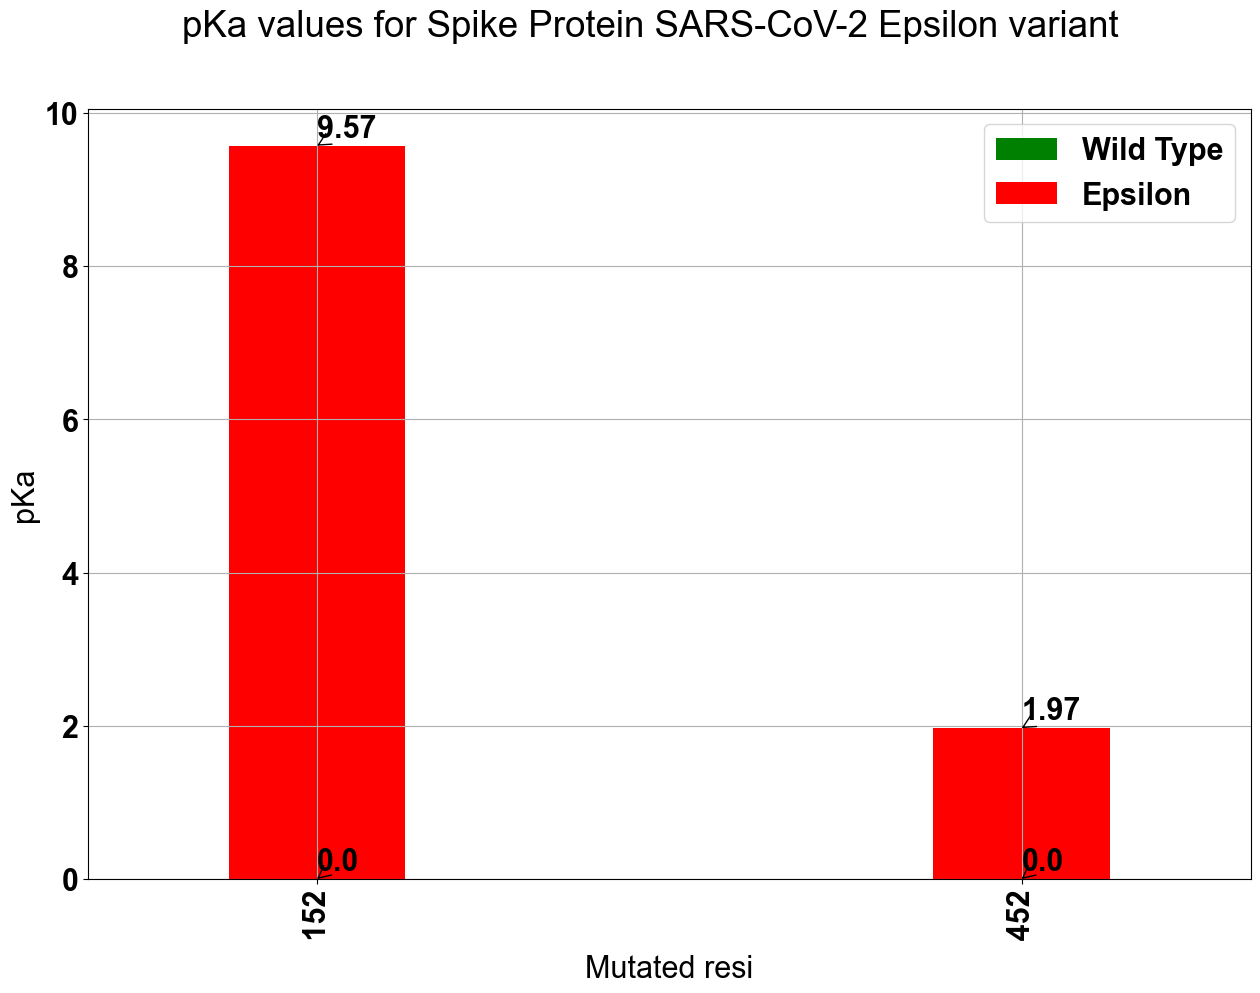

Zeta


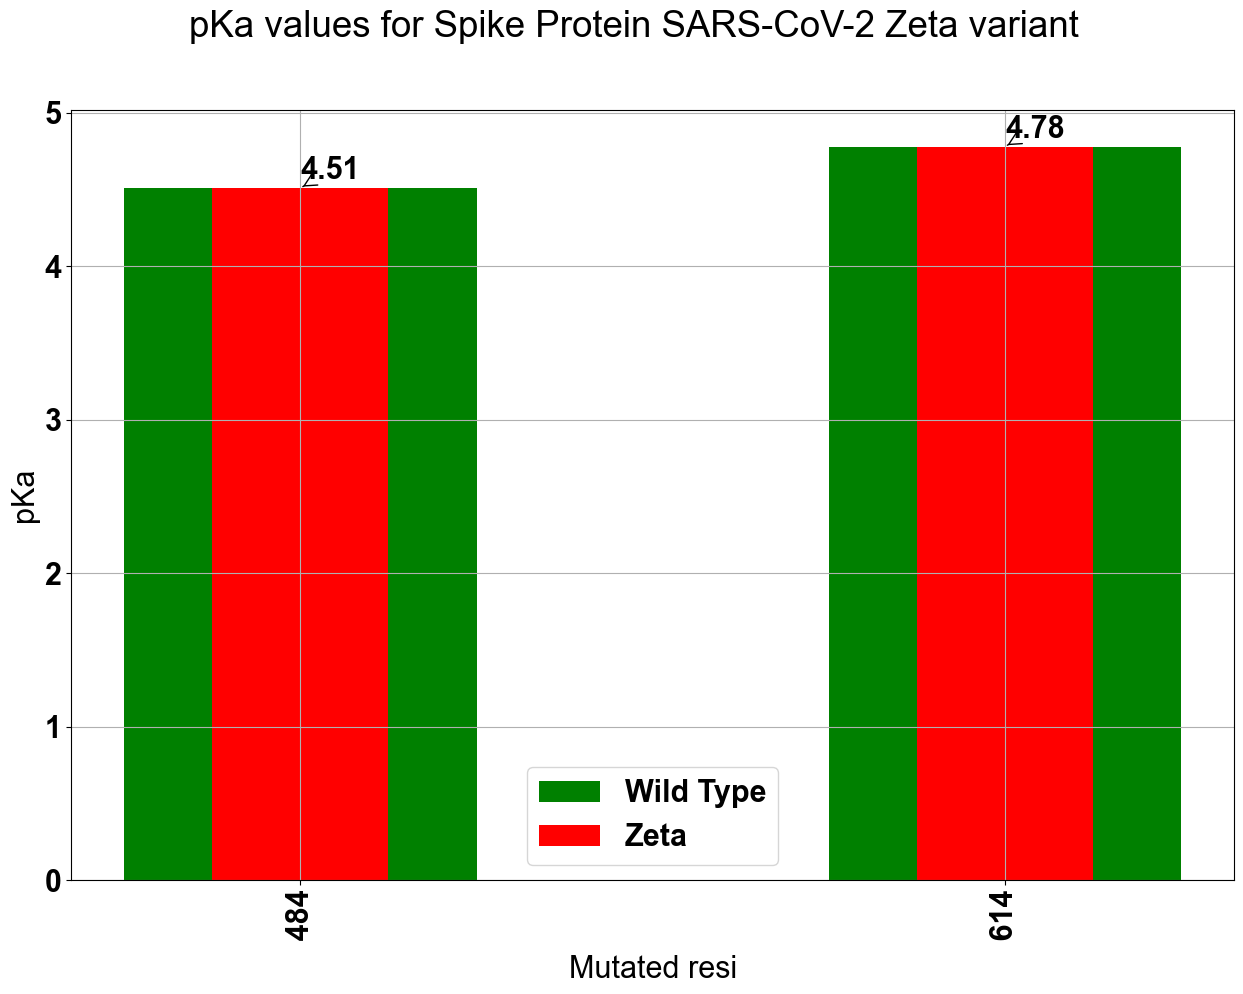

Beta
Alpha


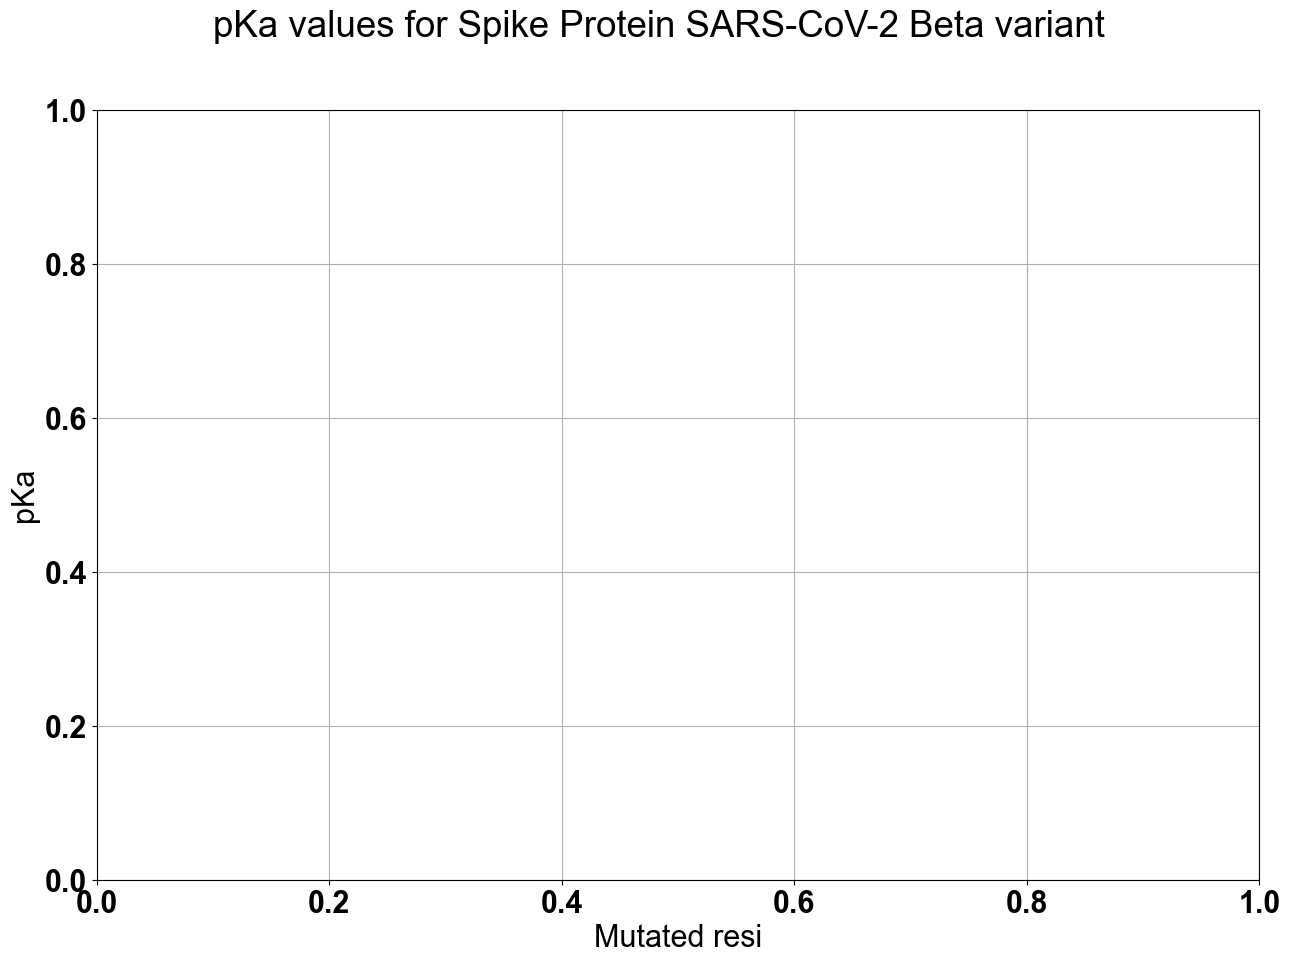

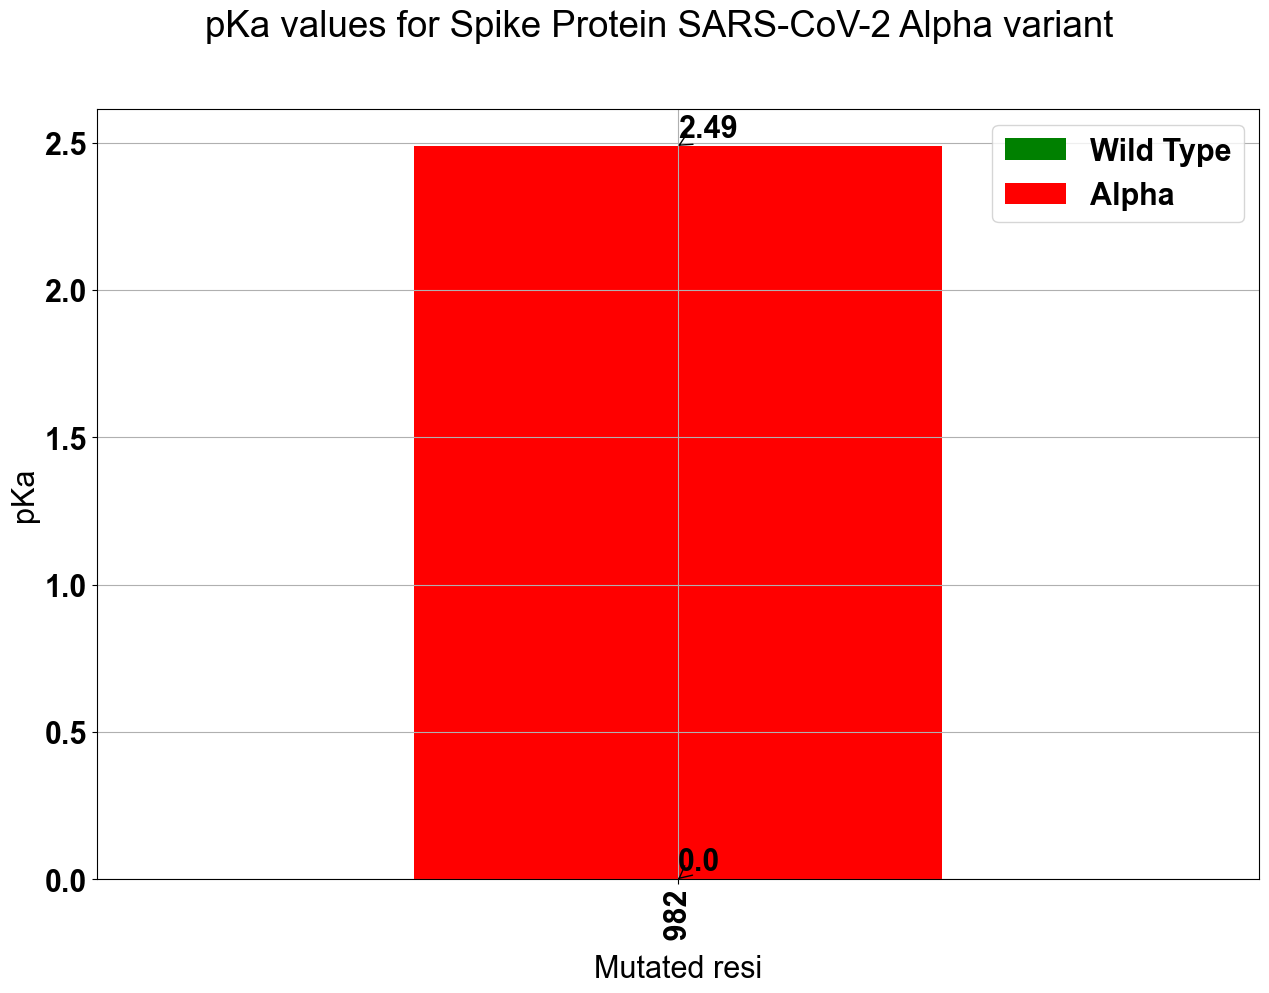

Delta


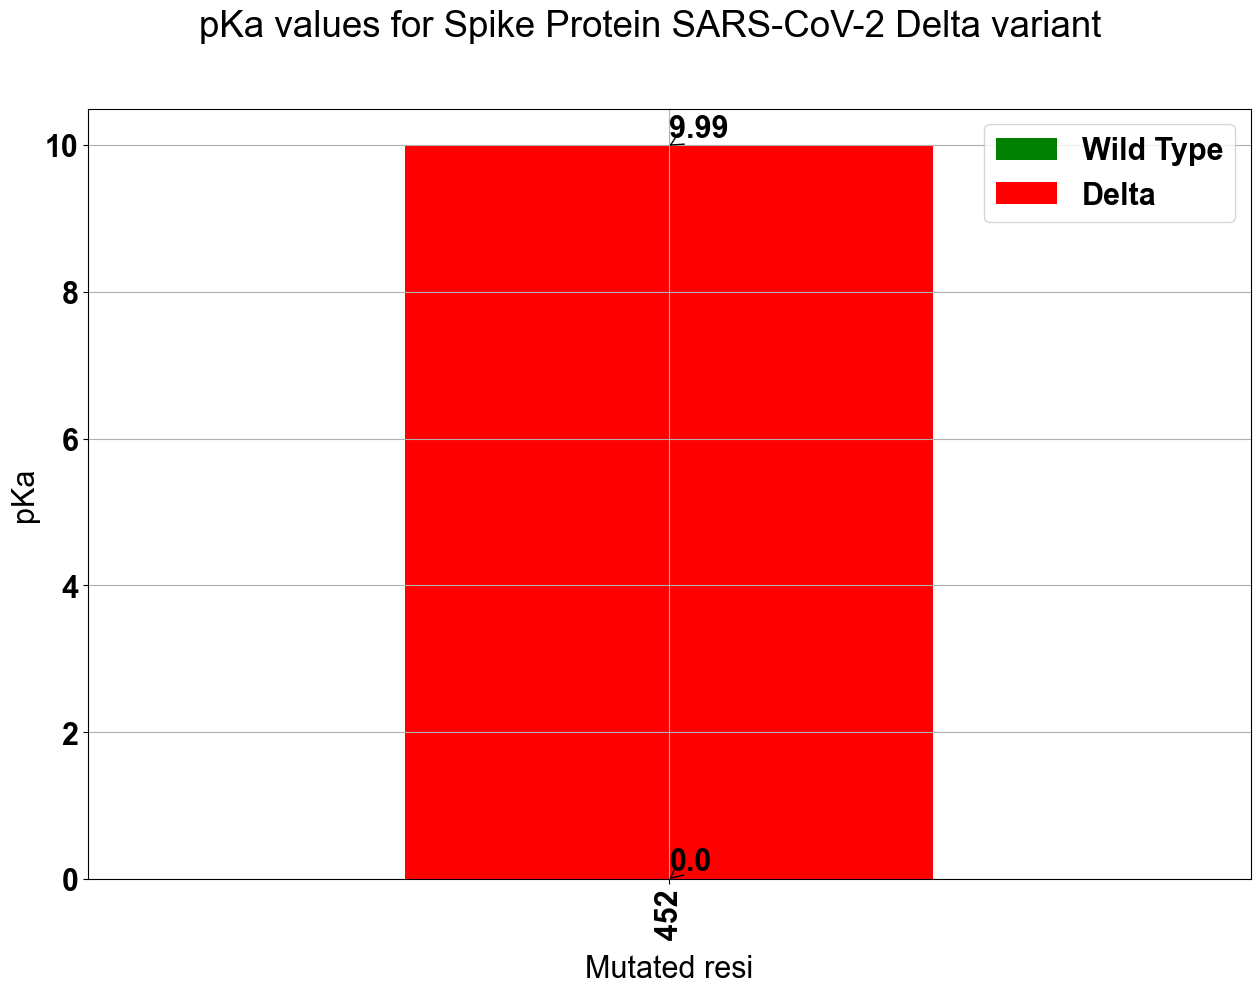

Kappa


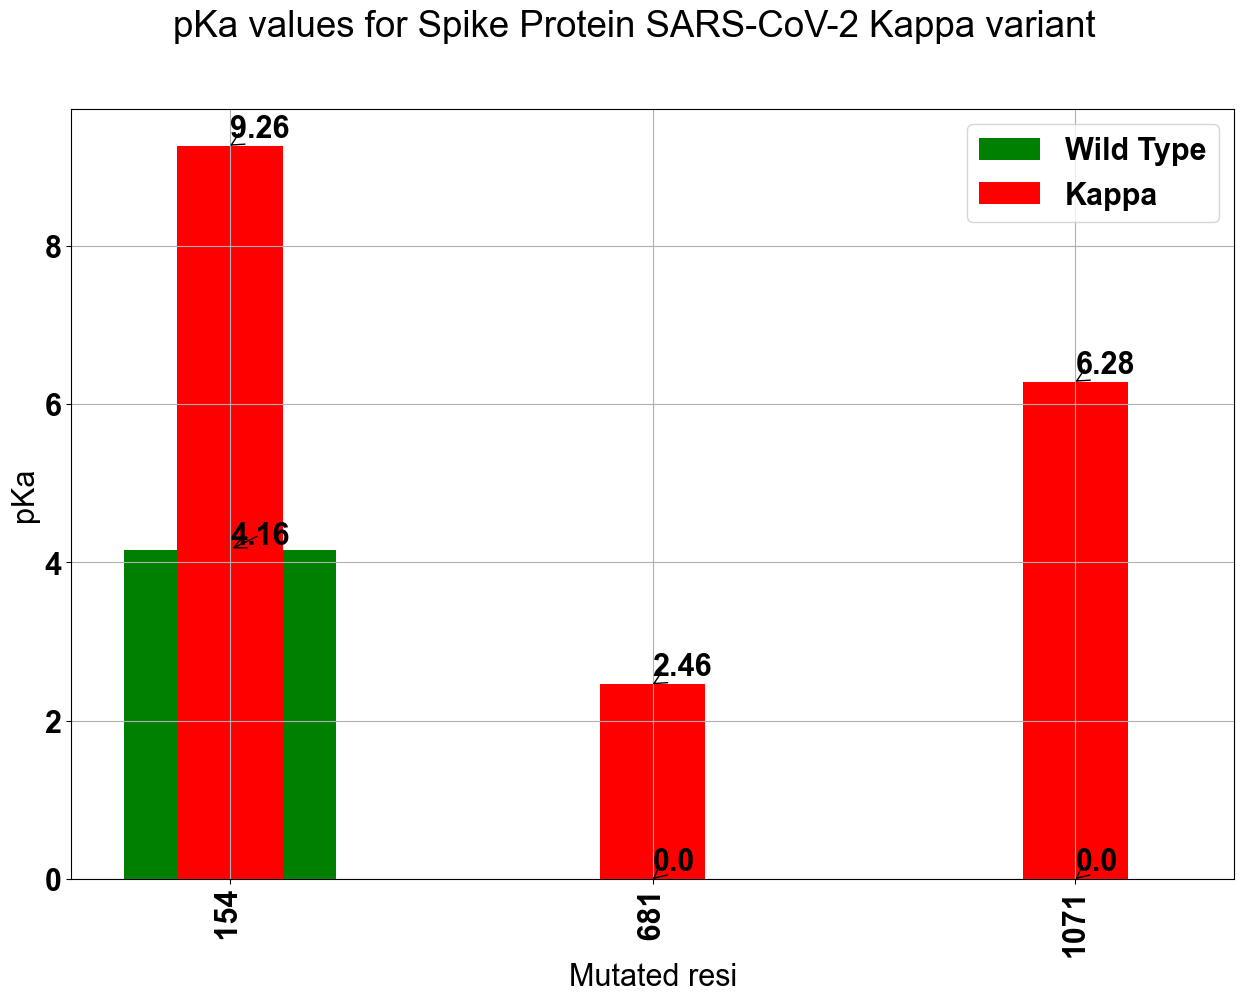

Gamma


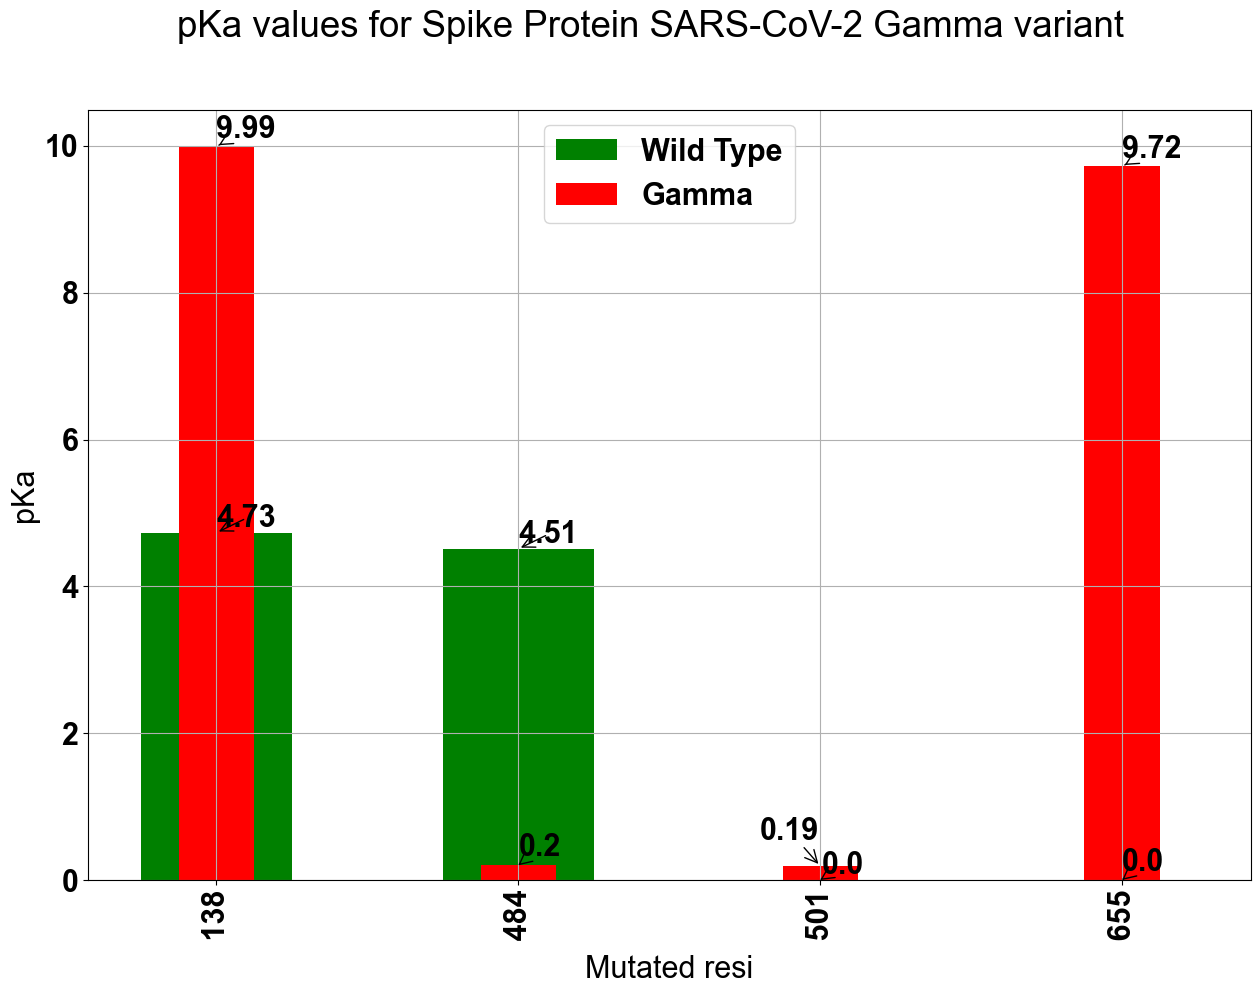

Iota1


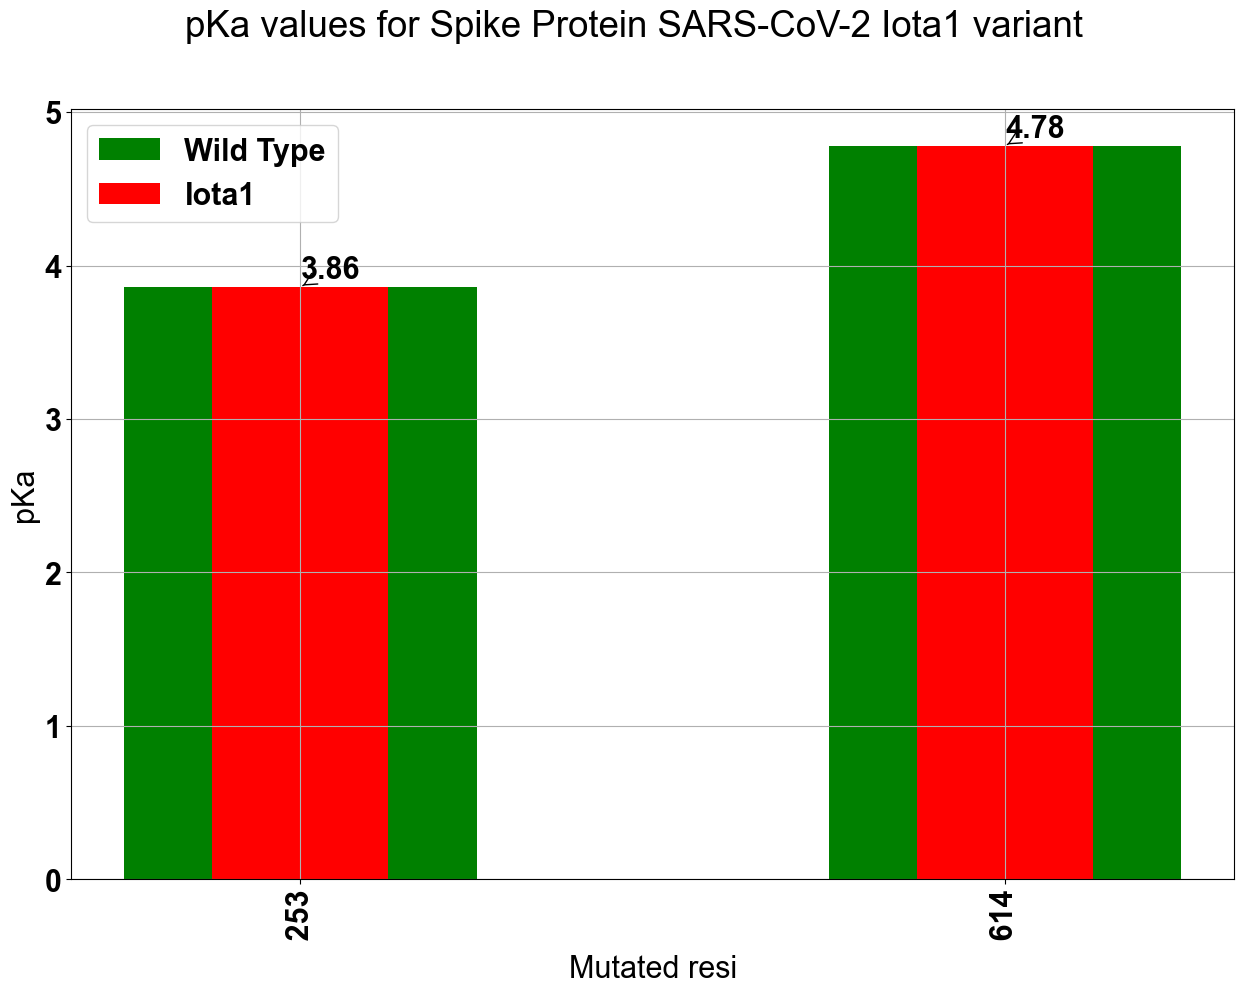

Iota2


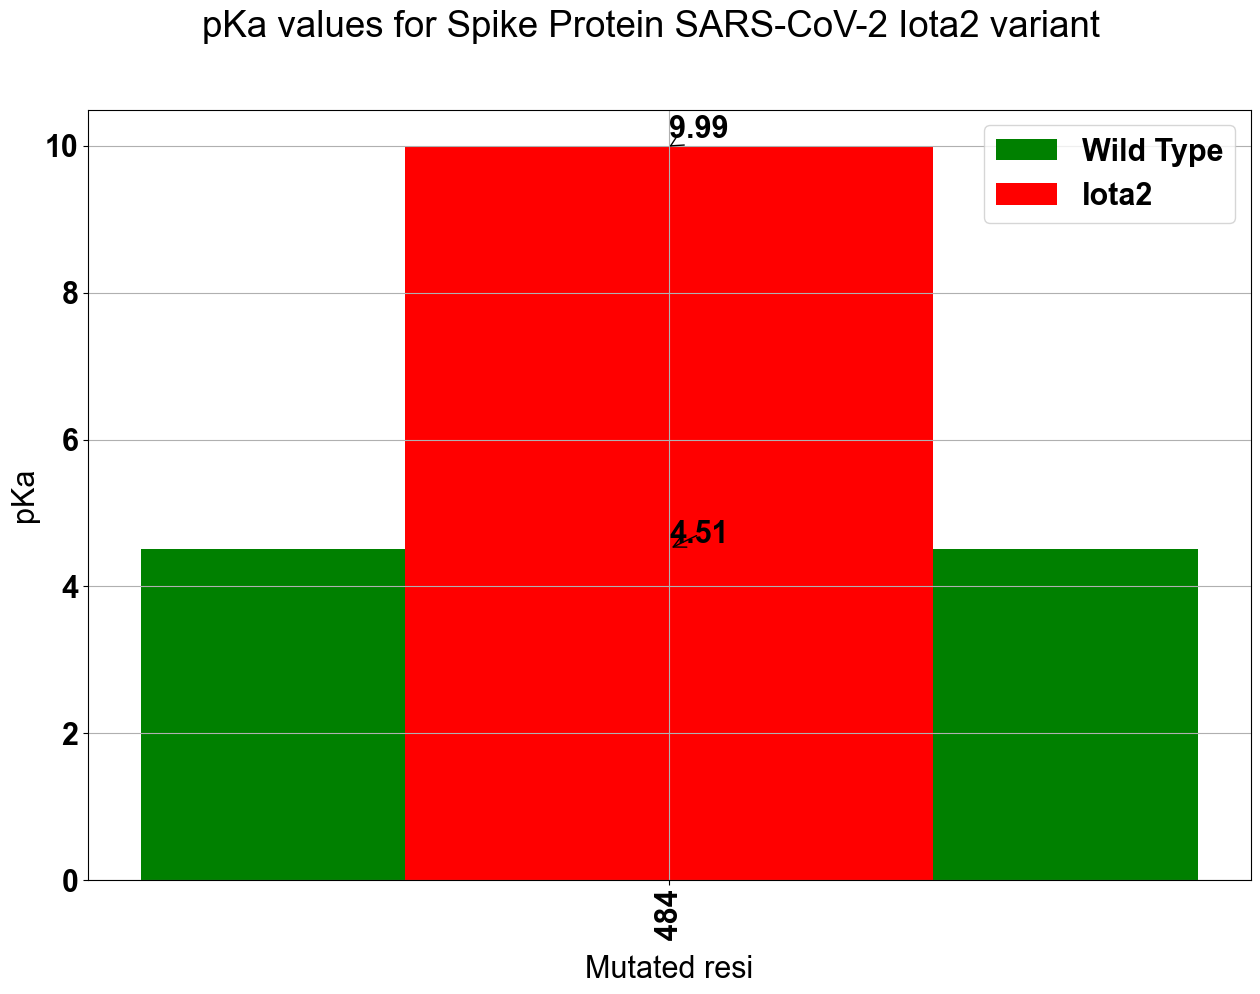

Eta


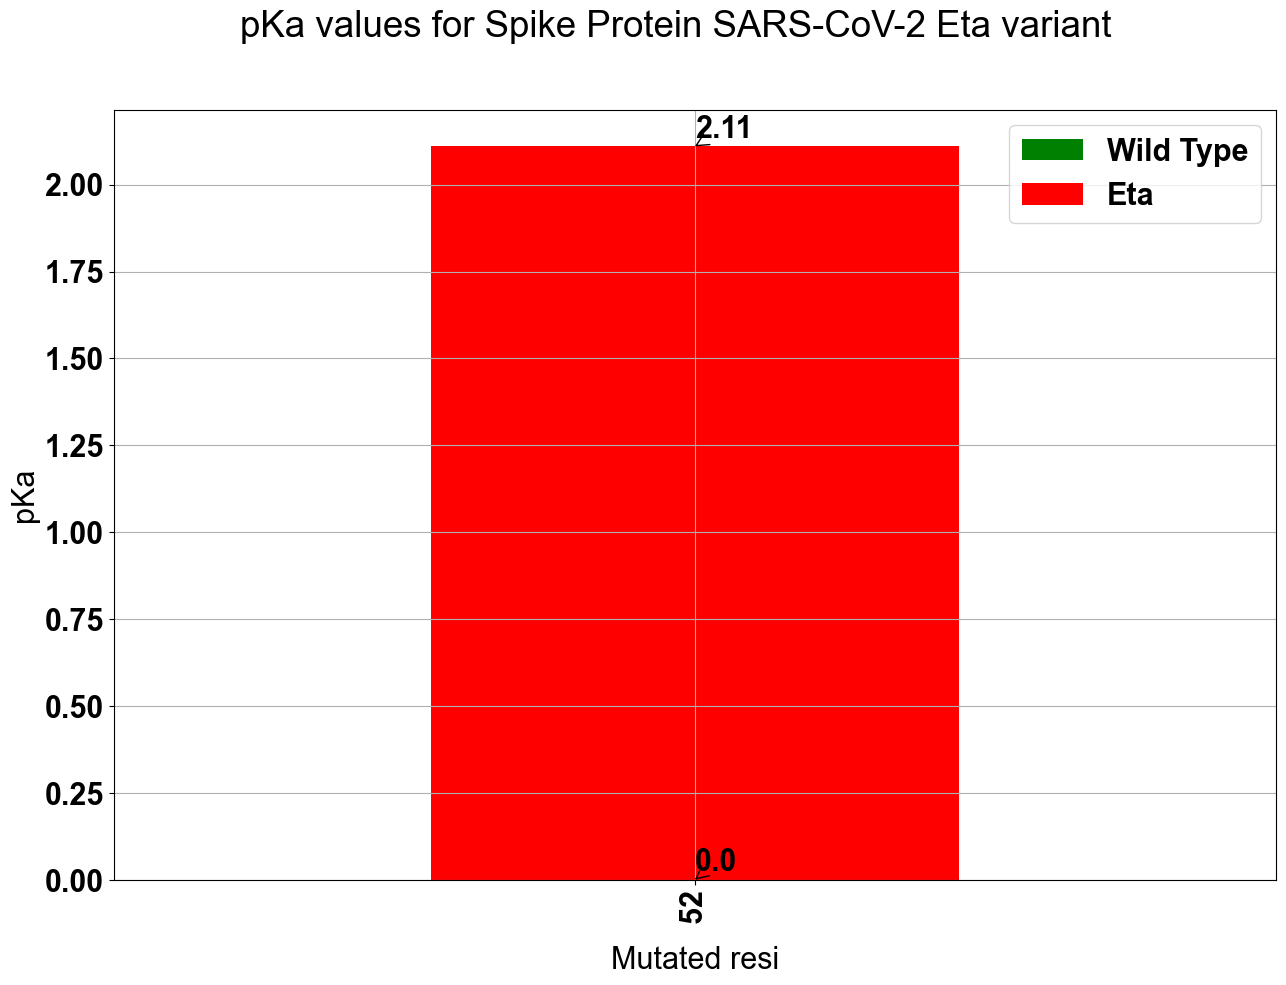

Ihu


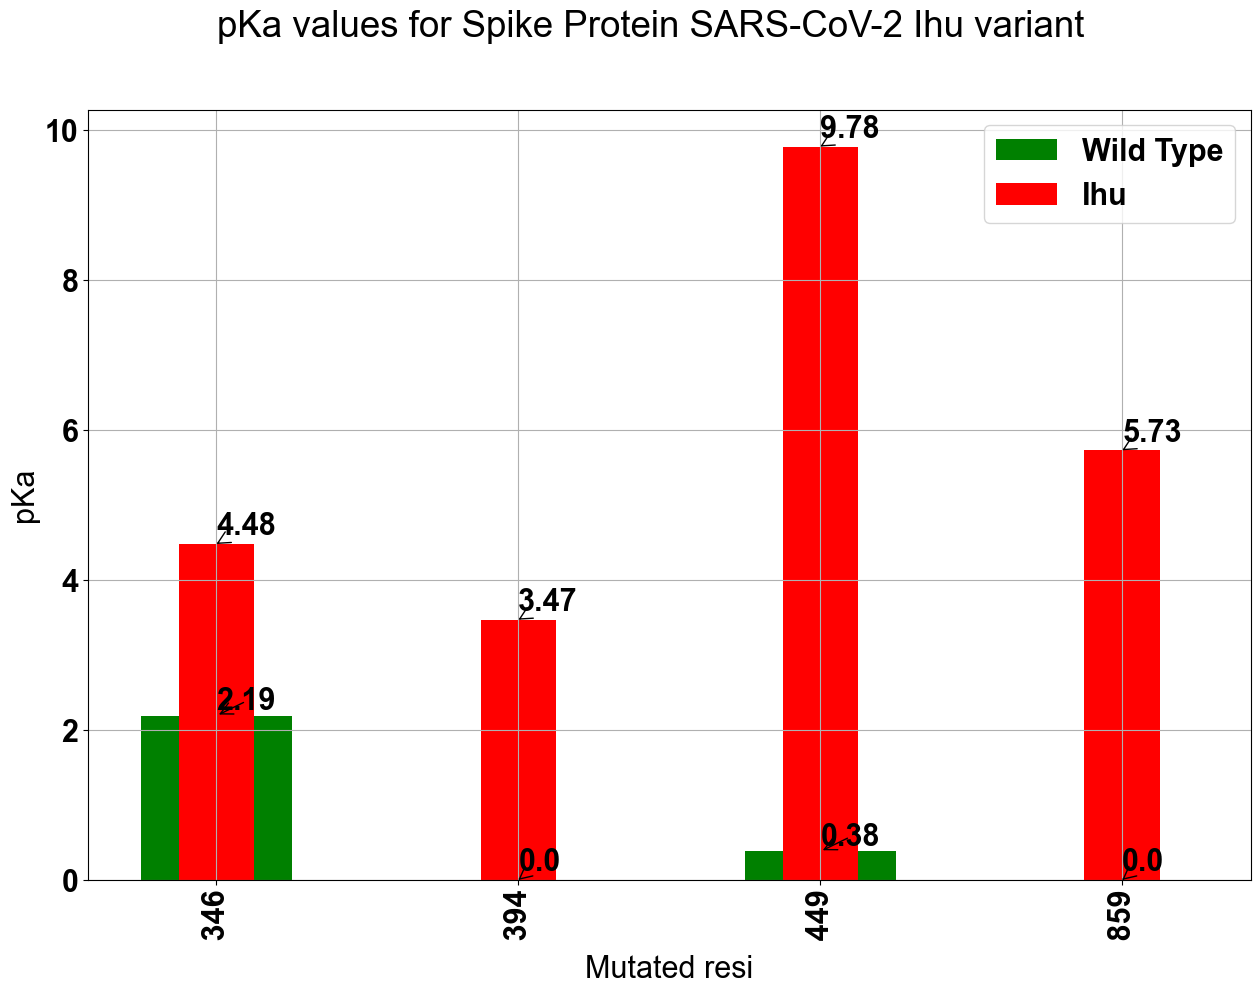

Omicron1


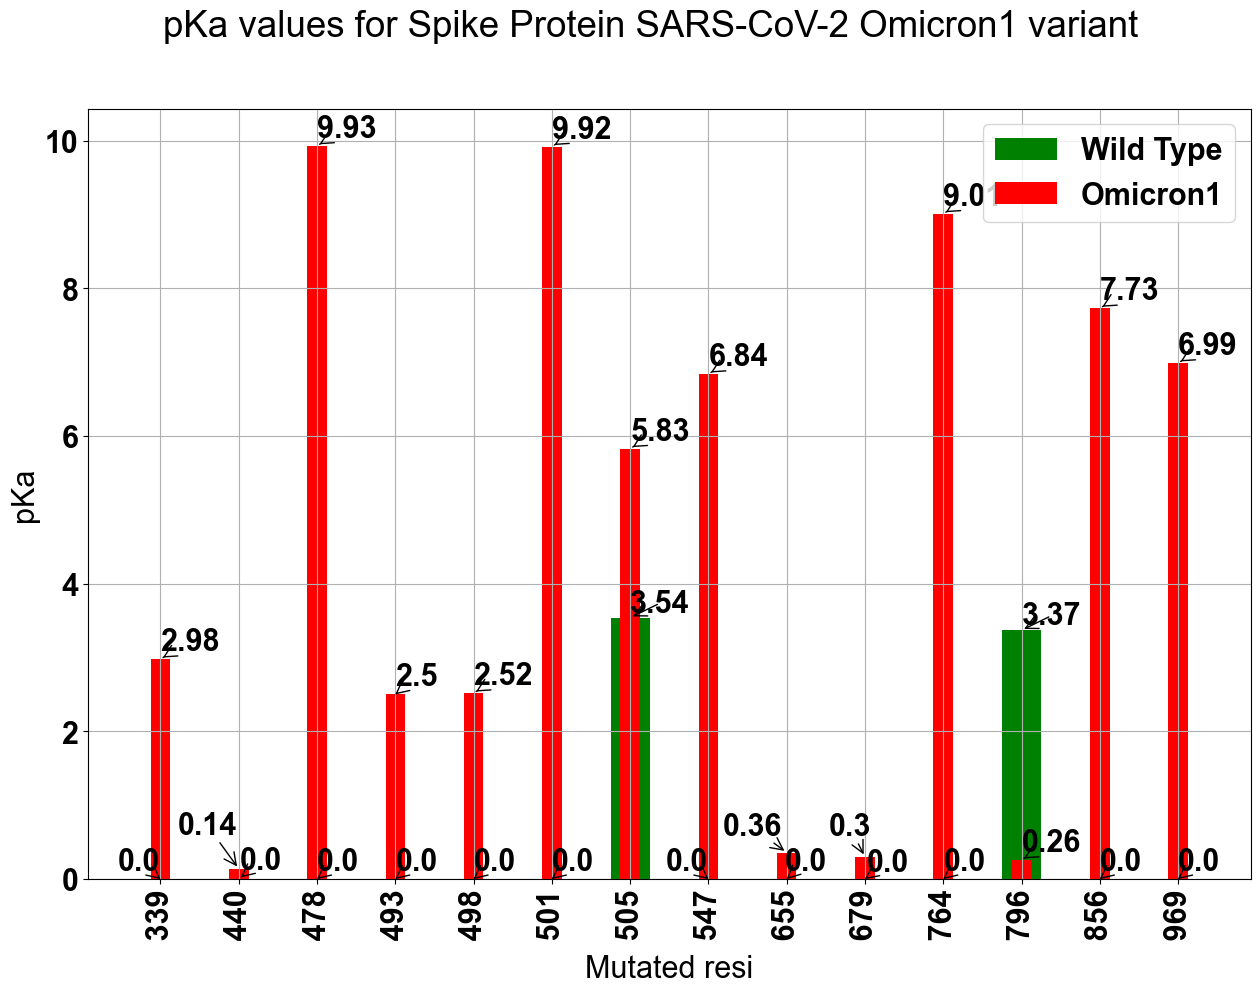

Omicron5


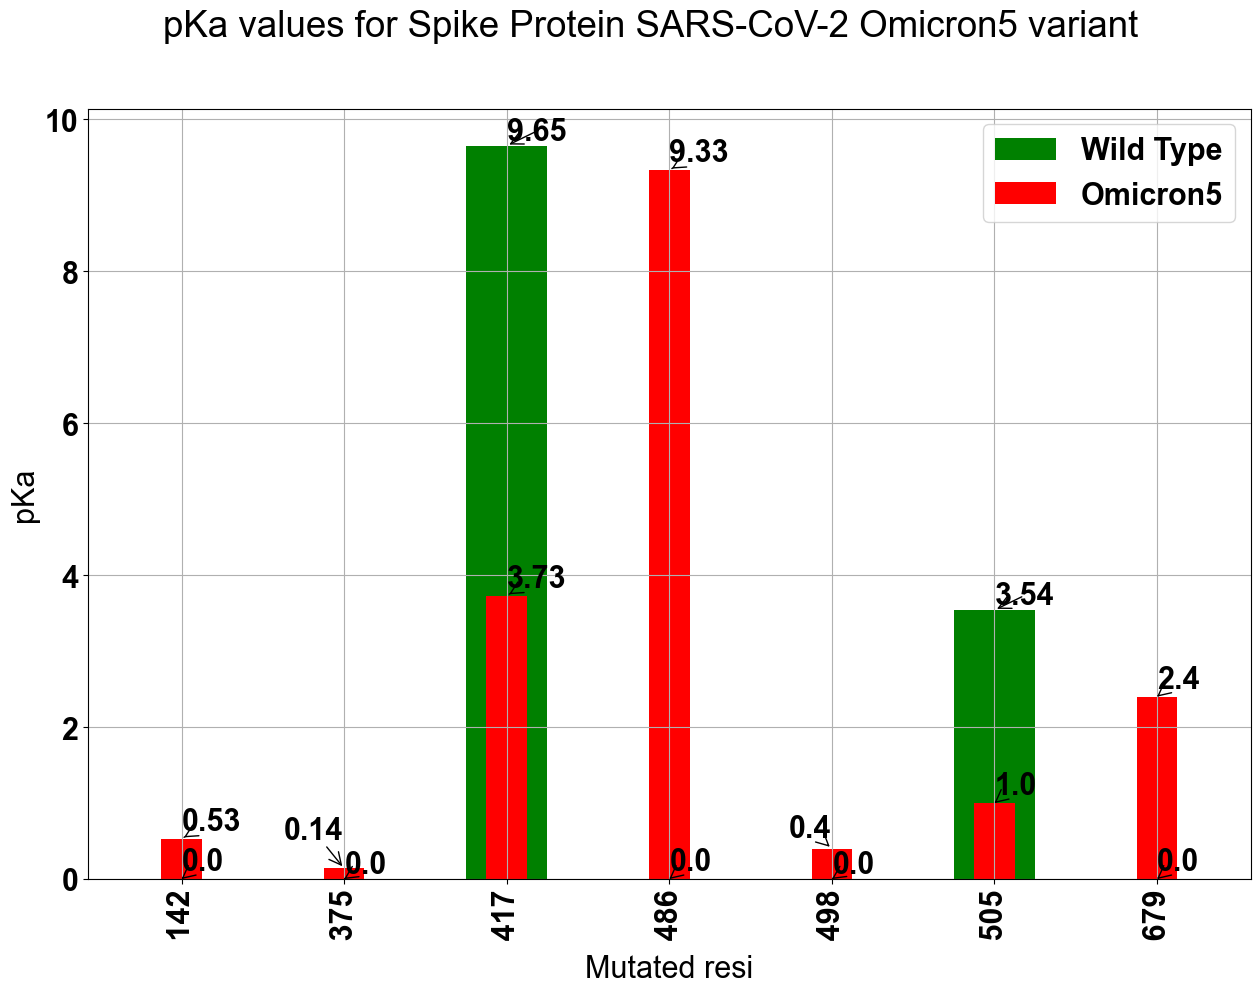

In [17]:
import matplotlib 

for variant, variant_name in spikes.items():
    if variant_name != "Wild Type":
        mutations = spike_muts_variants[spikes[variant]]
    else:
        mutations = muts_wt
    if variant_name != "Wild Type":
        fig, ax = plt.subplots(figsize = (15,10))
        print(variant_name)
        chain = "A"
        #print(all_extracted_lines[variant])
        #resi =  [int(elem[0][3:7]) for elem in all_extracted_lines[variant]]
        resi =  []
        for elem in all_extracted_lines[variant]:
            try:
                temp = int(elem[0][3:7])
                resi.append(temp)
            finally:
                continue

        idx = np.argsort(resi)
        x = np.array([all_extracted_lines[variant][i][0] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
        #print(x)
        y = np.array([all_extracted_lines[variant][i][1] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
        x_muts = [elem for elem in x if int(elem[3:7]) in mutations]
        y_muts = [y[i] for i, elem in enumerate(x) if int(elem[3:7]) in mutations]
        aas_var = {int(elem[3:7]): elem[:3] for elem in x if int(elem[3:7]) in mutations}
        plt.grid(True)
        plt.ylabel('pKa')
        plt.xlabel('Mutated resi')
        fig.suptitle('pKa values for Spike Protein SARS-CoV-2 {} variant'.format(variant_name))
        
        texts = []
        index = 0
        for i, x_mut in enumerate(x_muts):
            y_mut = y_muts[i]
            y_wt = y_muts_wt[int(x_mut[3:7])]
            aa_wt = aas_wt[int(x_mut[3:7])]
            aa_variant = aas_var[int(x_mut[3:7])]
            
            if y_wt != "NM" and y_mut != 0:
                if index == 0:
                    
                    plt.bar(x_mut[3:7], y_wt, color = "g", alpha=1.0, width=0.5, align='center', label = "Wild Type")
                    plt.bar(x_mut[3:7], y_mut, color = "r", alpha=1.0, width=0.25, align='center', label = variant_name)
                else:
                    plt.bar(x_mut[3:7], y_wt, color = "g", alpha=1.0, width=0.5, align='center', label = "_nolegend_")
                    plt.bar(x_mut[3:7], y_mut, color = "r", alpha=1.0, width=0.25, align='center', label = "_nolegend_")
        
                index += 1
                texts.append(plt.text(i, y_wt, round(y_wt, 3)))
                if y_mut != y_wt:
                    texts.append(plt.text(i, y_mut,  round(y_mut, 3)))
        font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
        matplotlib.rc('font', **font)
        if len(texts) > 0:
            adjust_text(texts, x = np.arange(0, len(x_muts)), y = y_muts, color = "r", only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='k', lw=1.0))
            plt.xticks(rotation='vertical')
            plt.legend()
            plt.savefig("Figures\Pka_plot\{}_vs_WT_pka.jpg".format(variant_name), dpi = 600)
            plt.show()

Epsilon


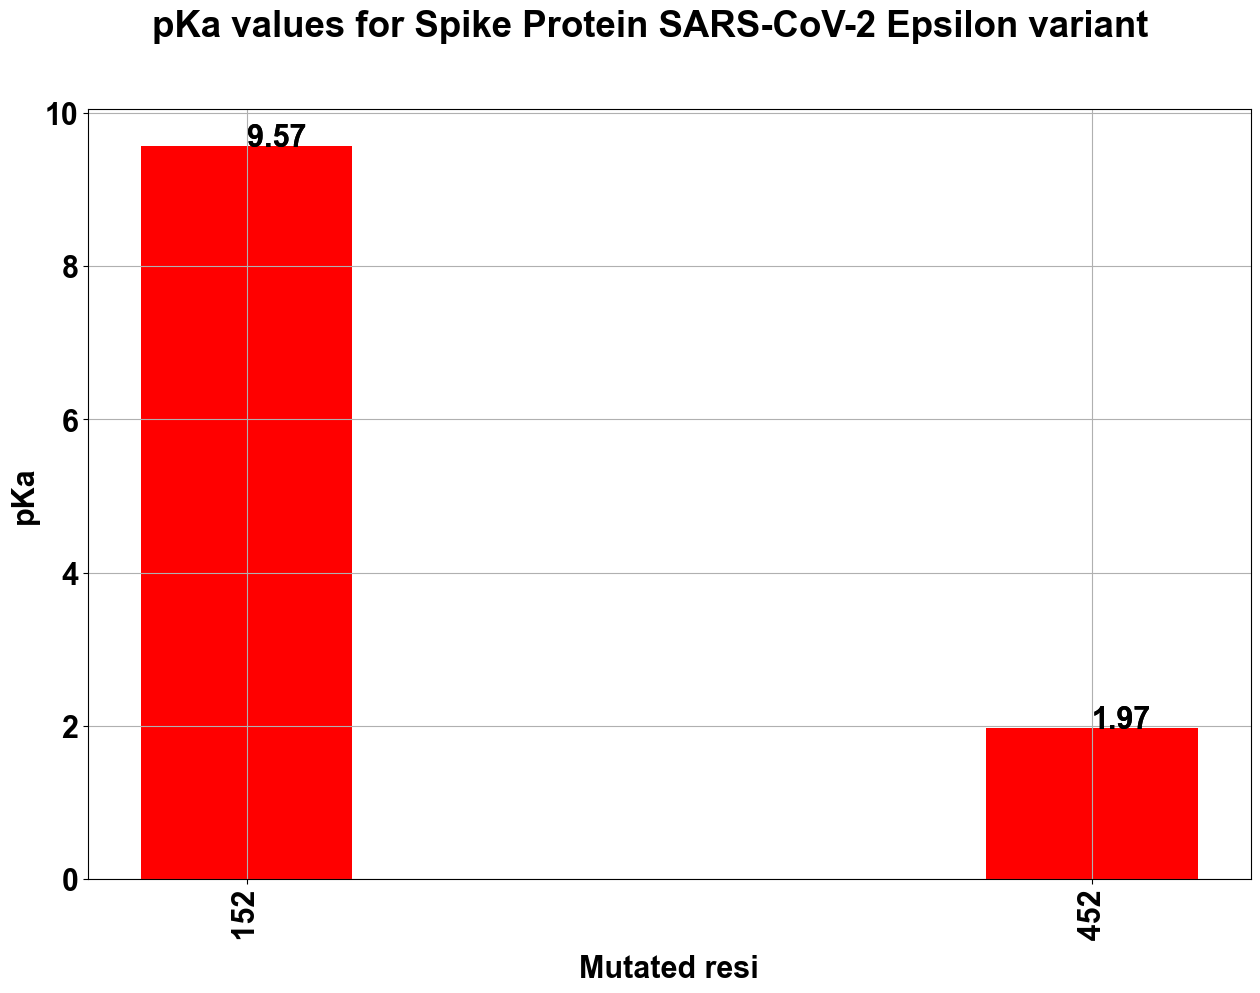

Zeta


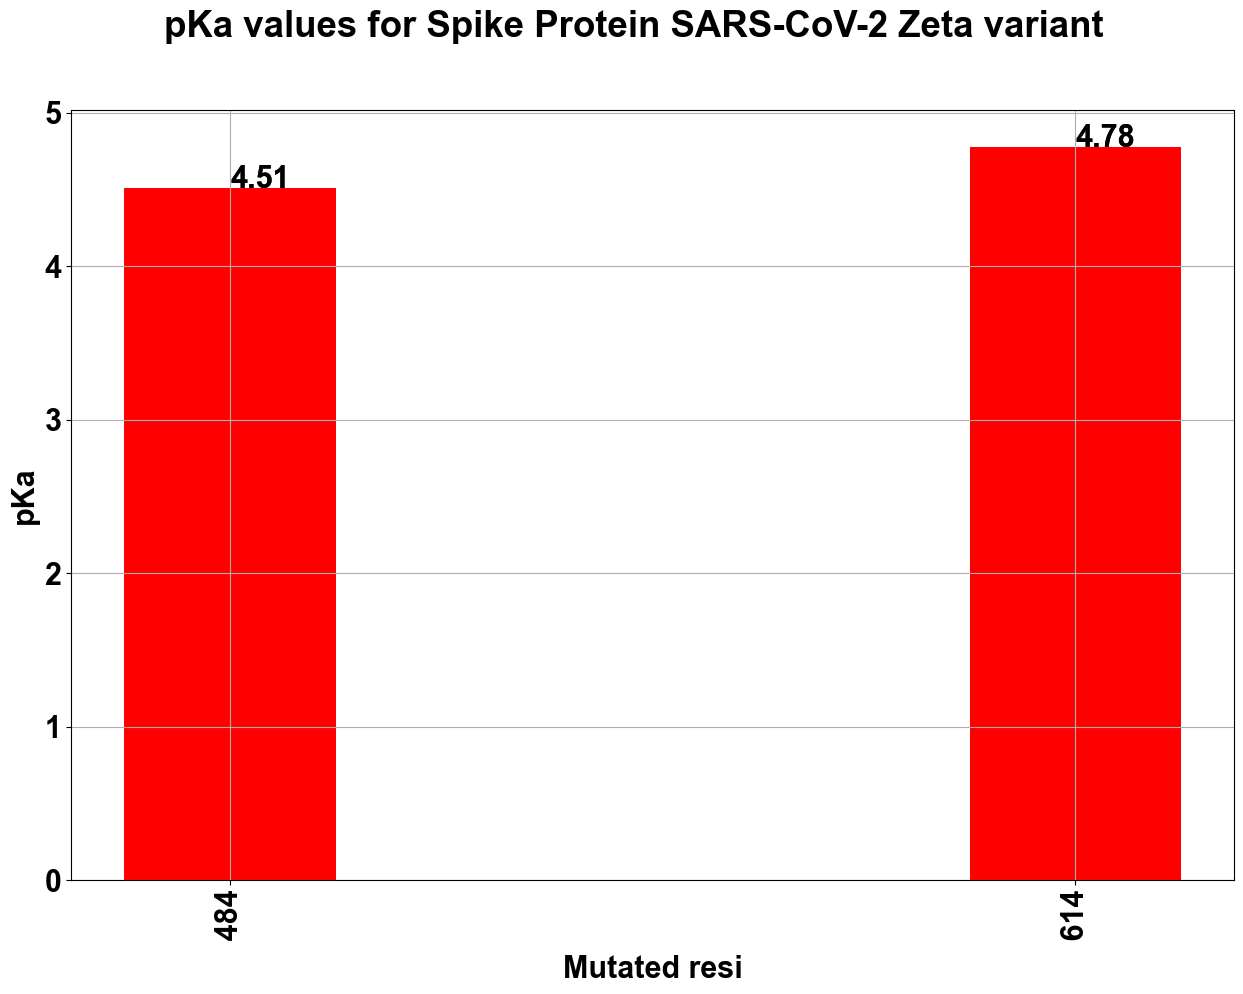

Beta
Alpha
Delta
Kappa


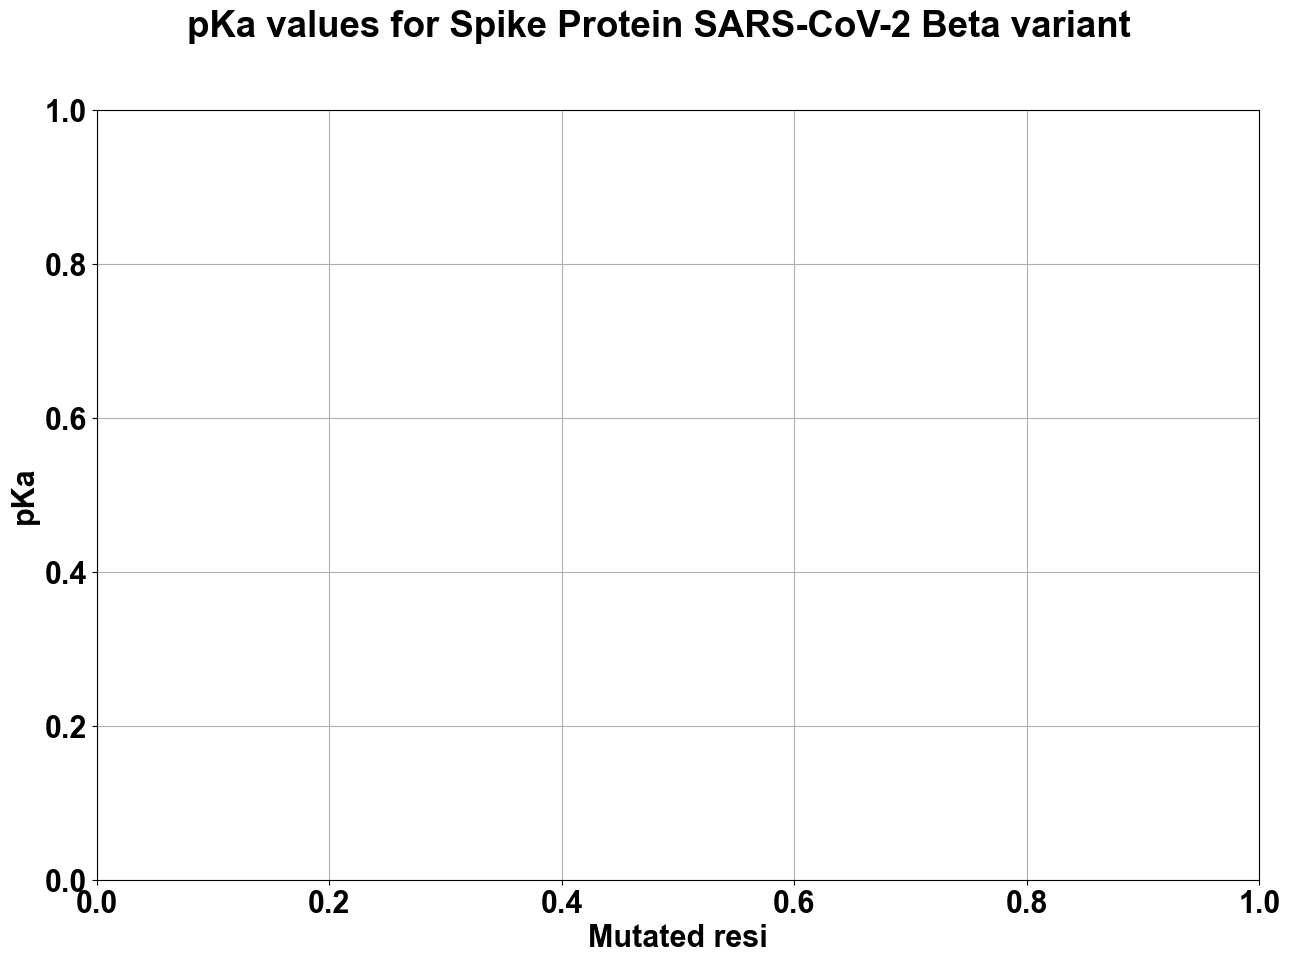

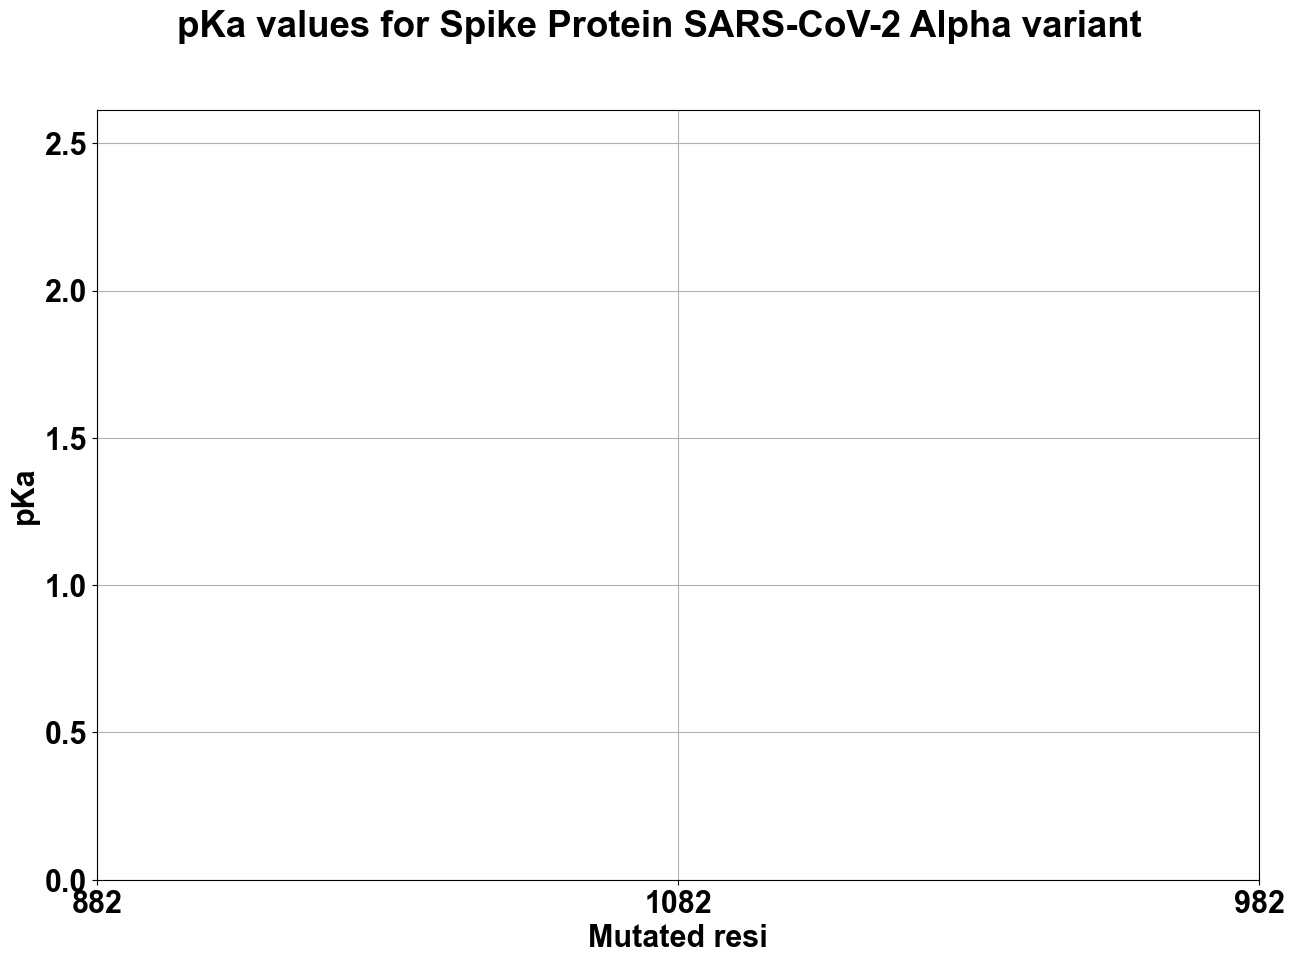

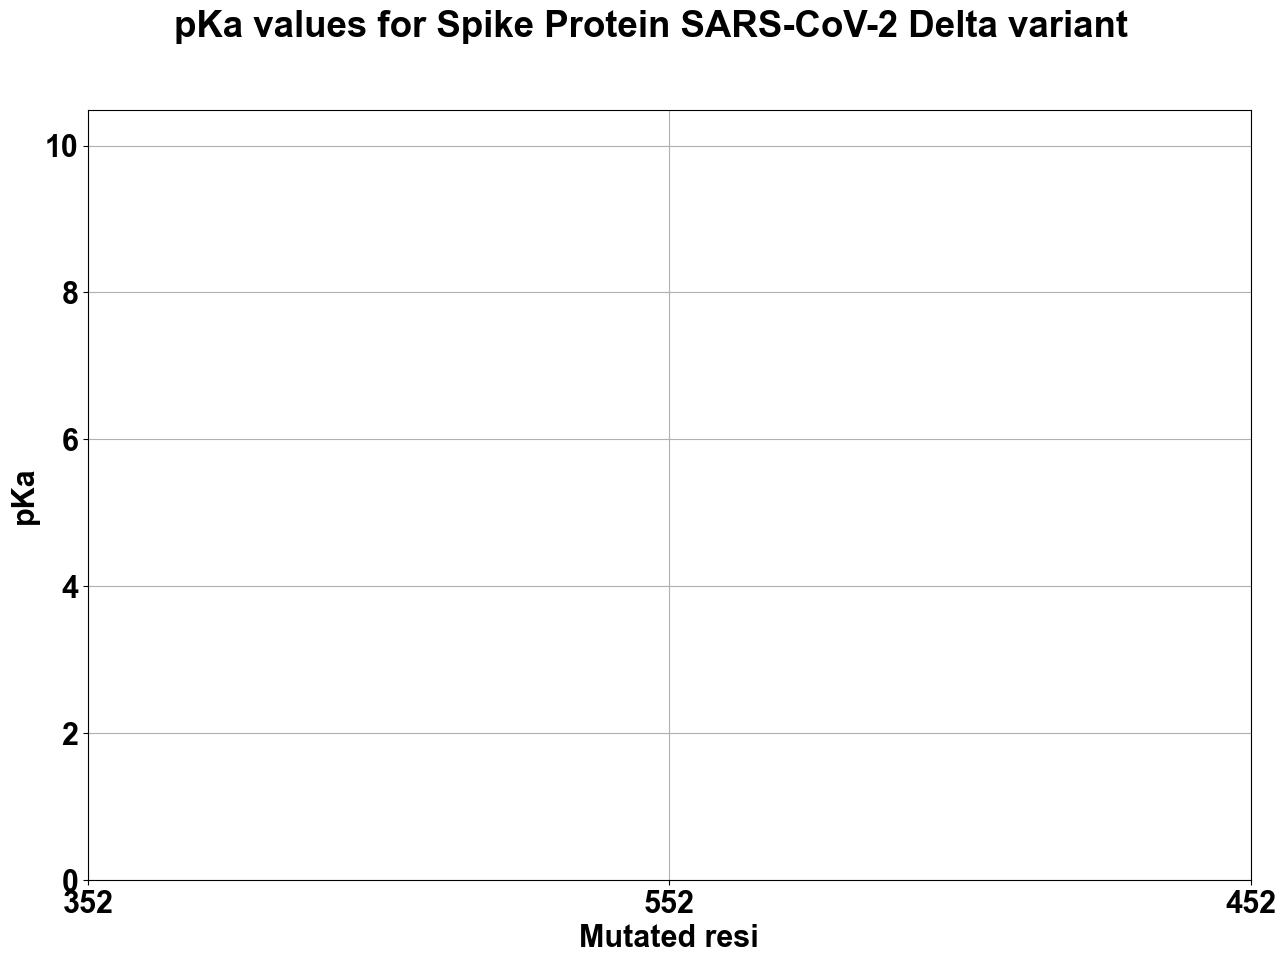

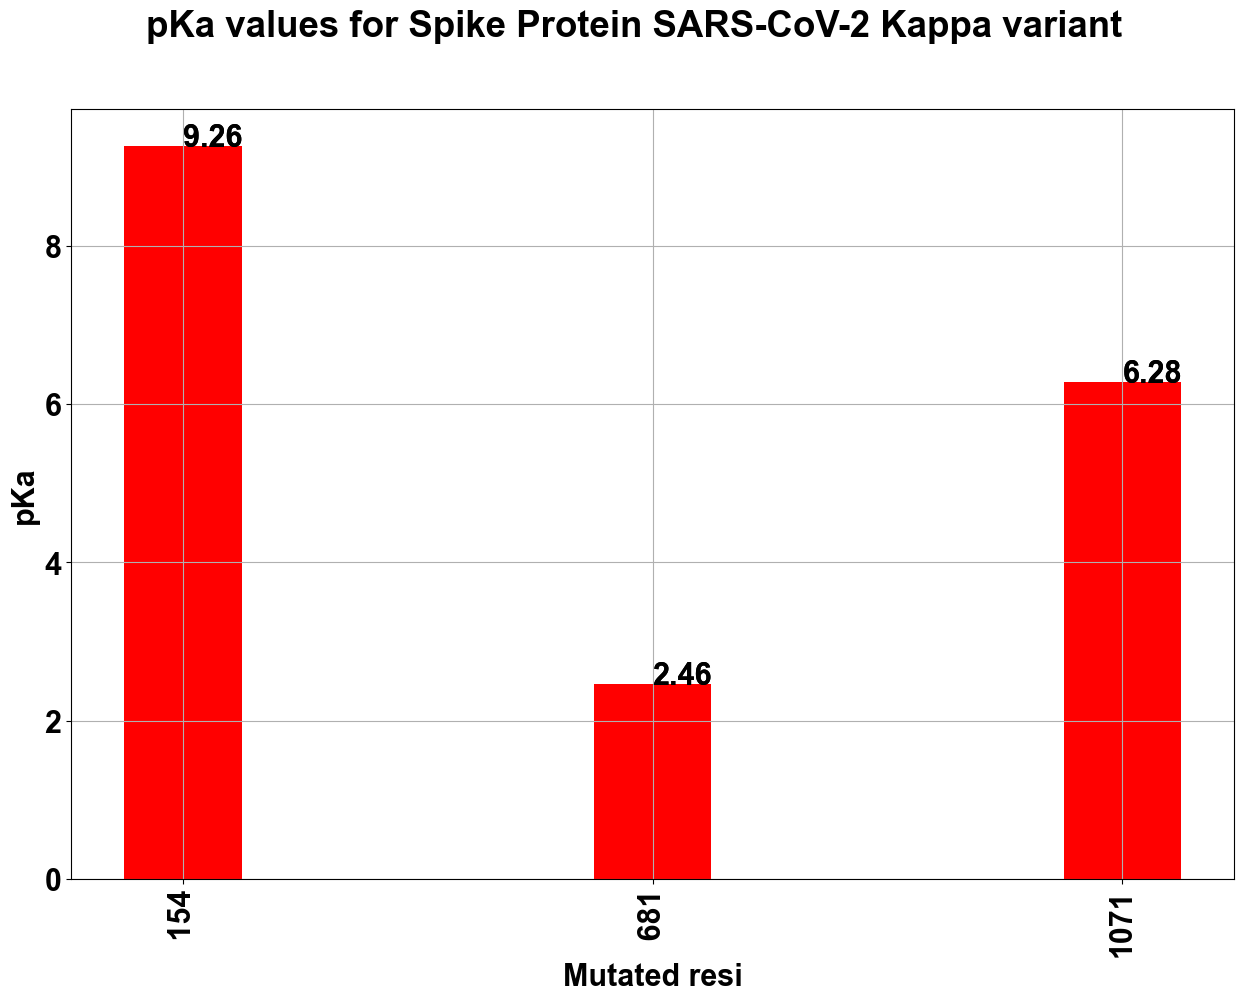

Gamma


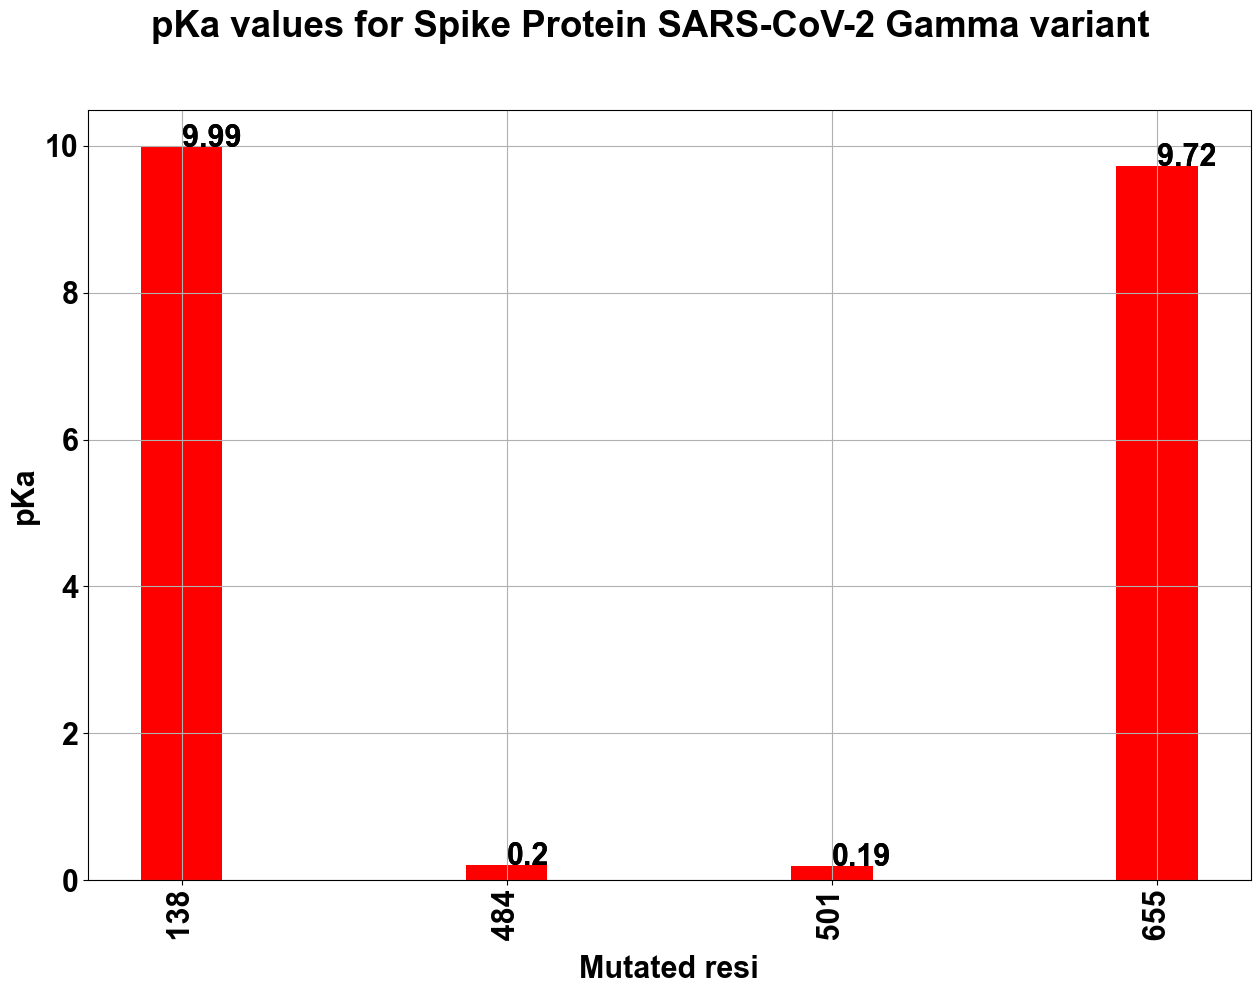

Iota1


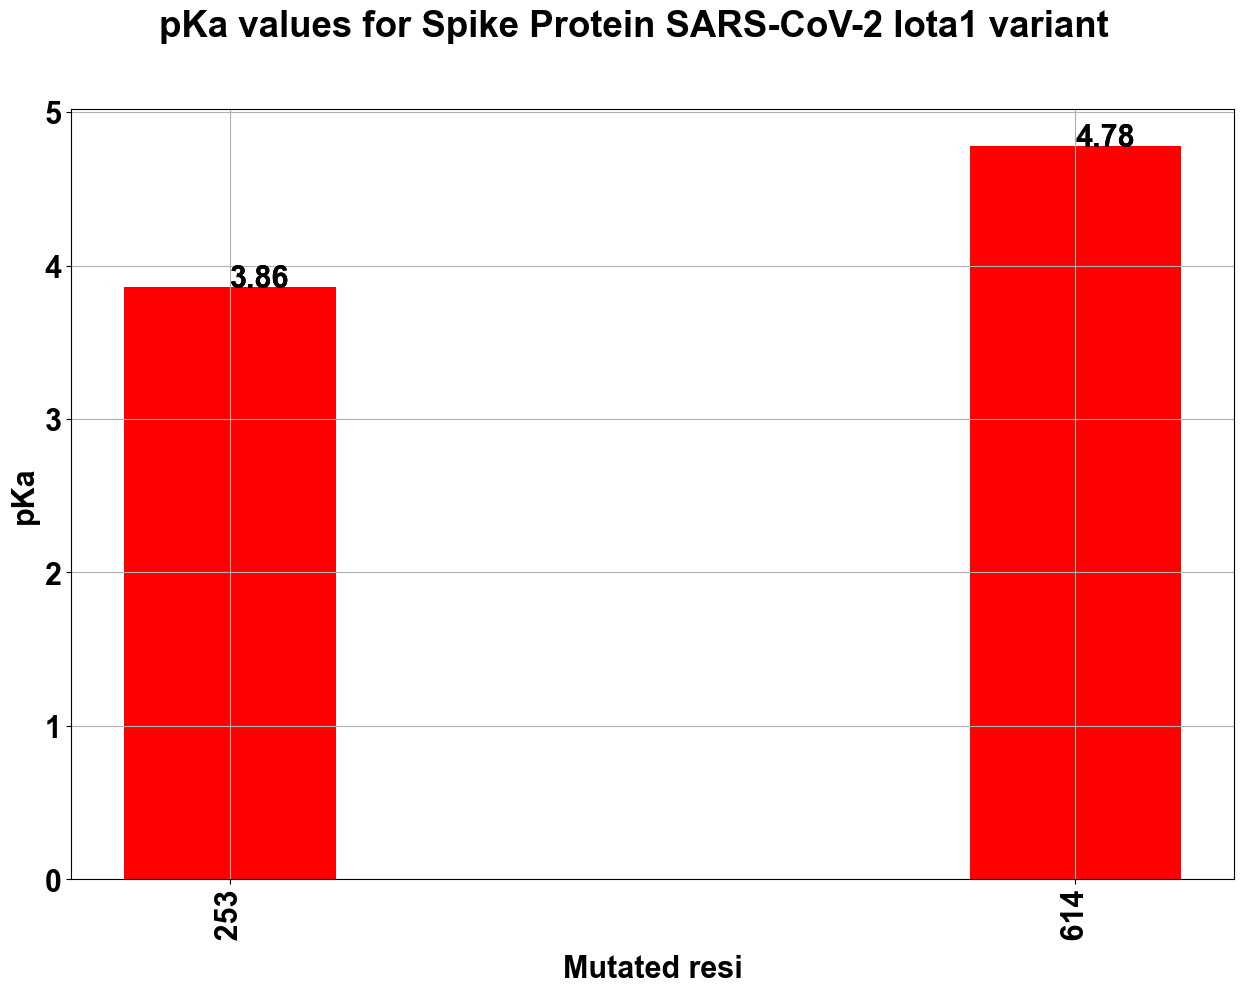

Iota2
Eta
Ihu


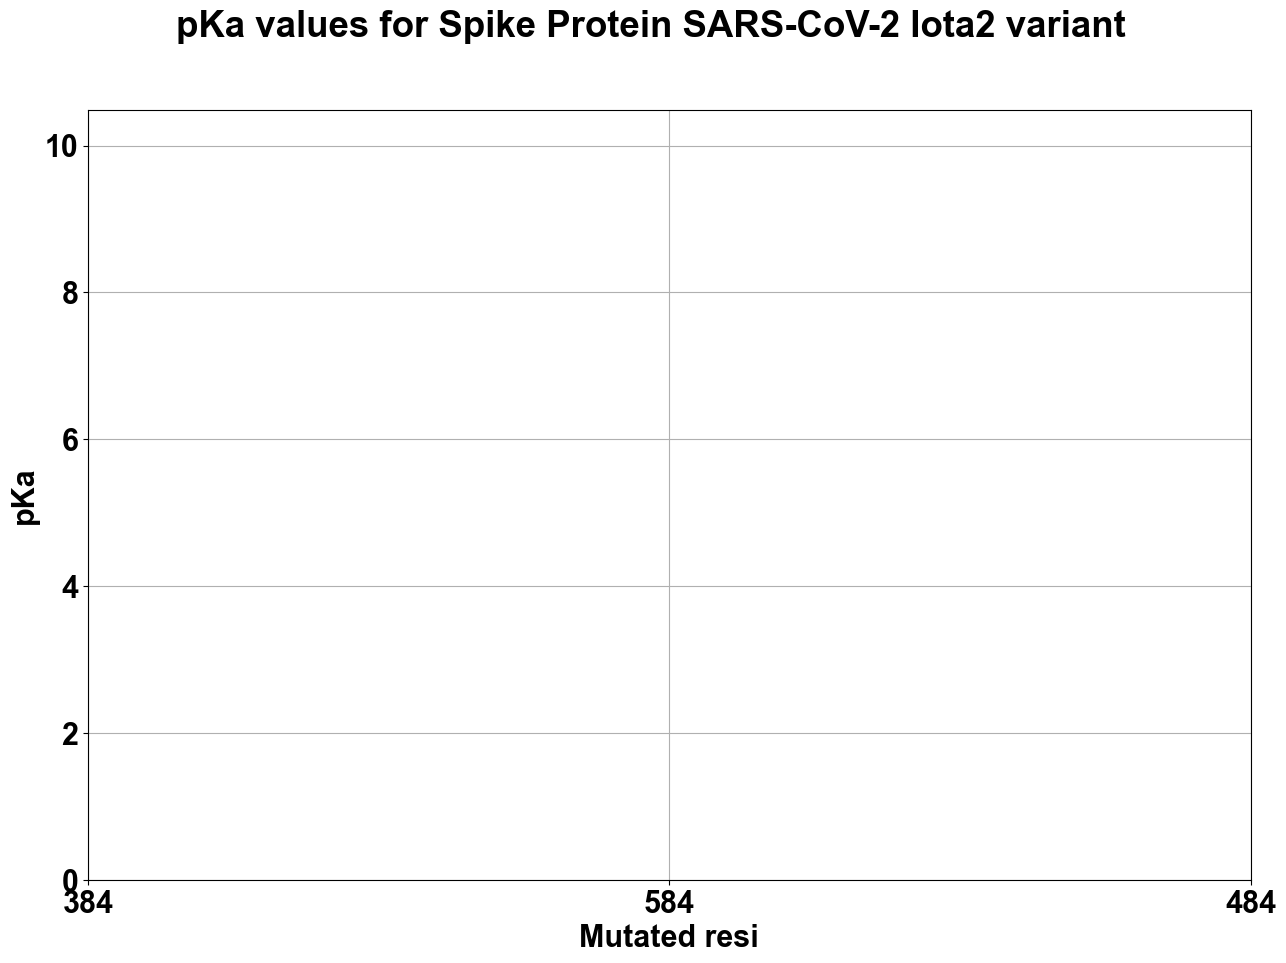

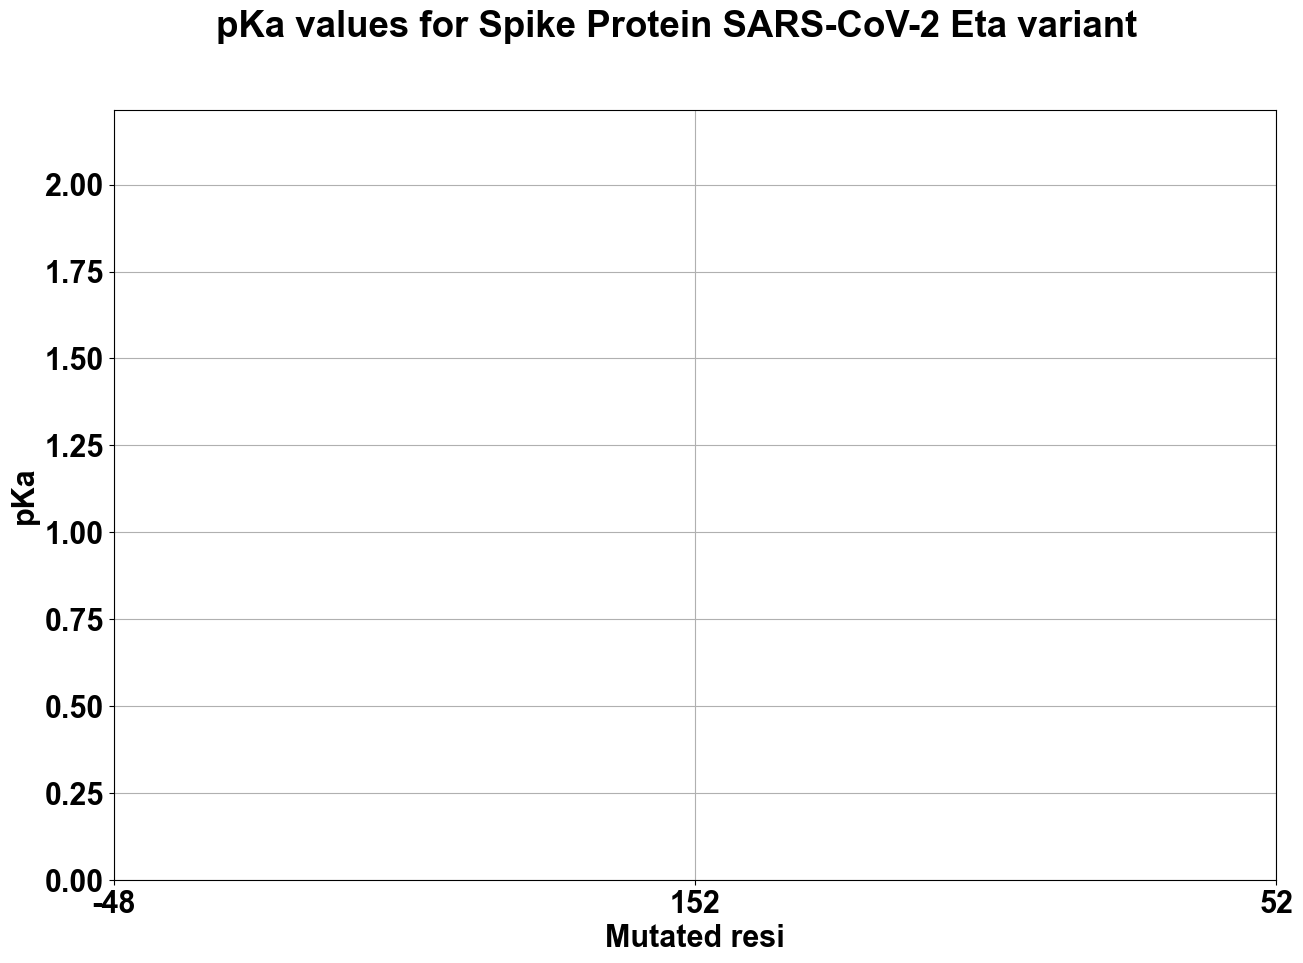

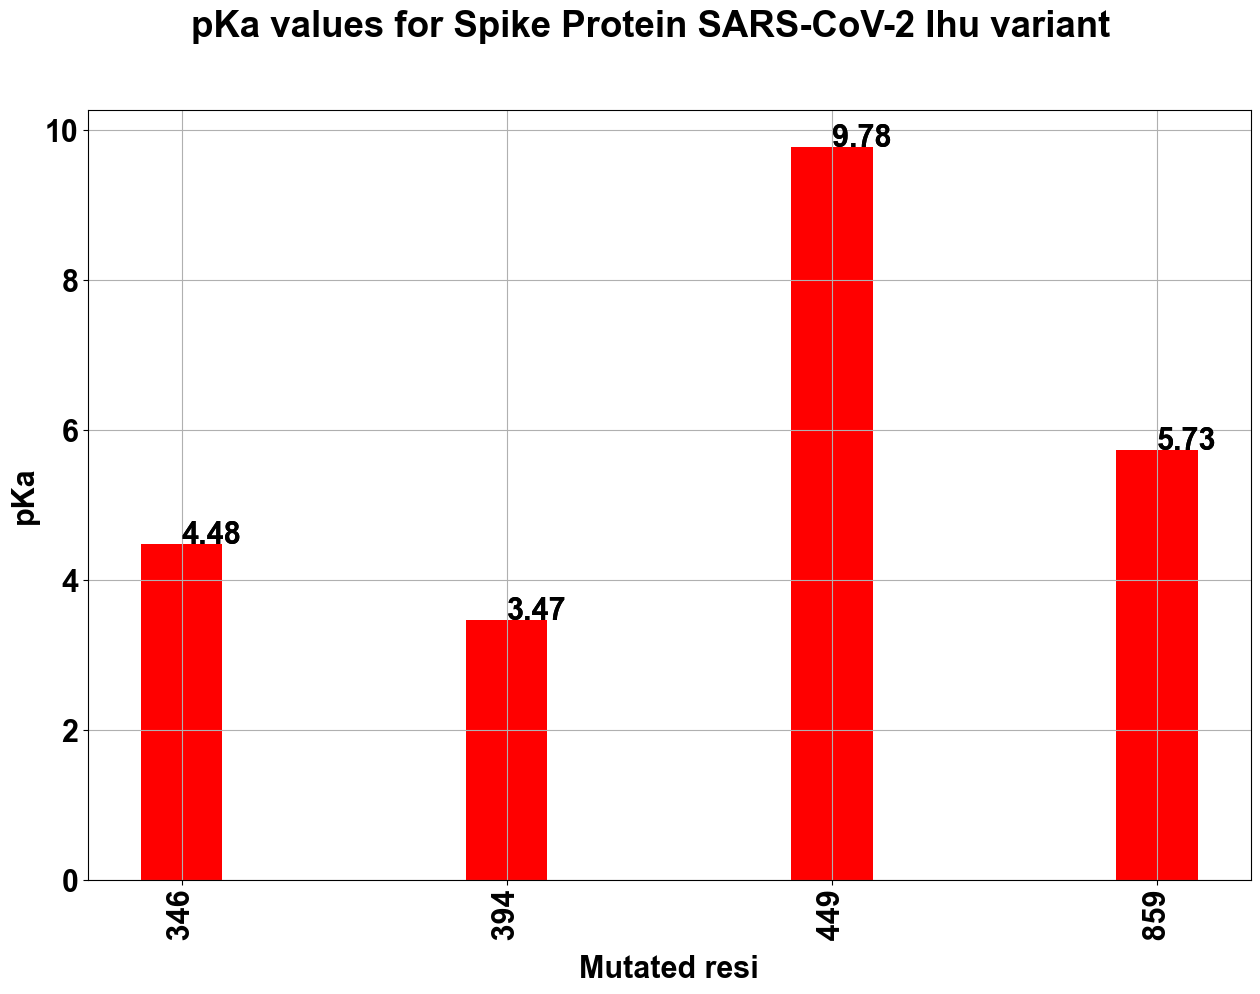

Omicron1


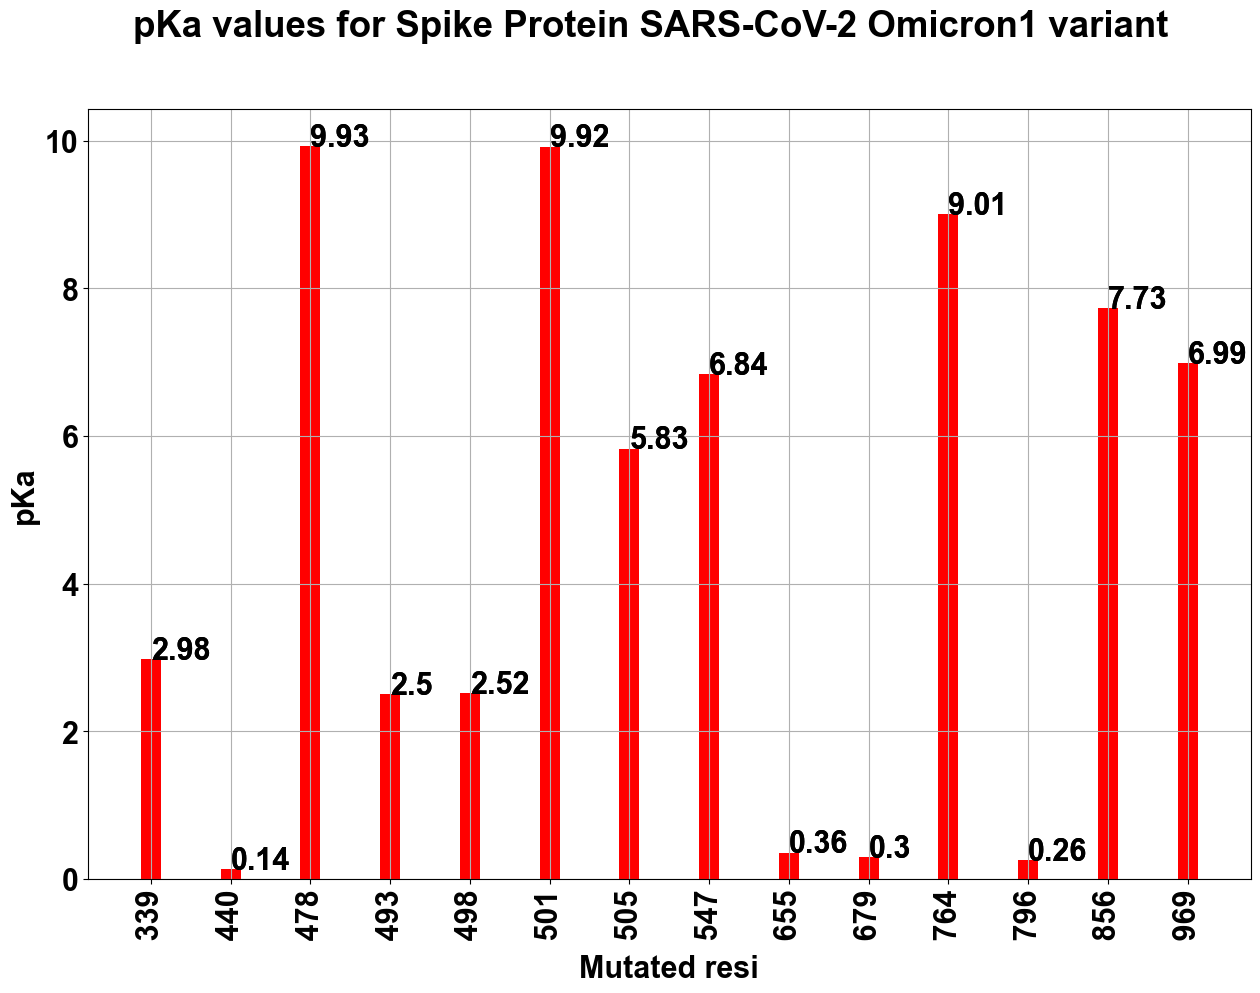

Omicron5


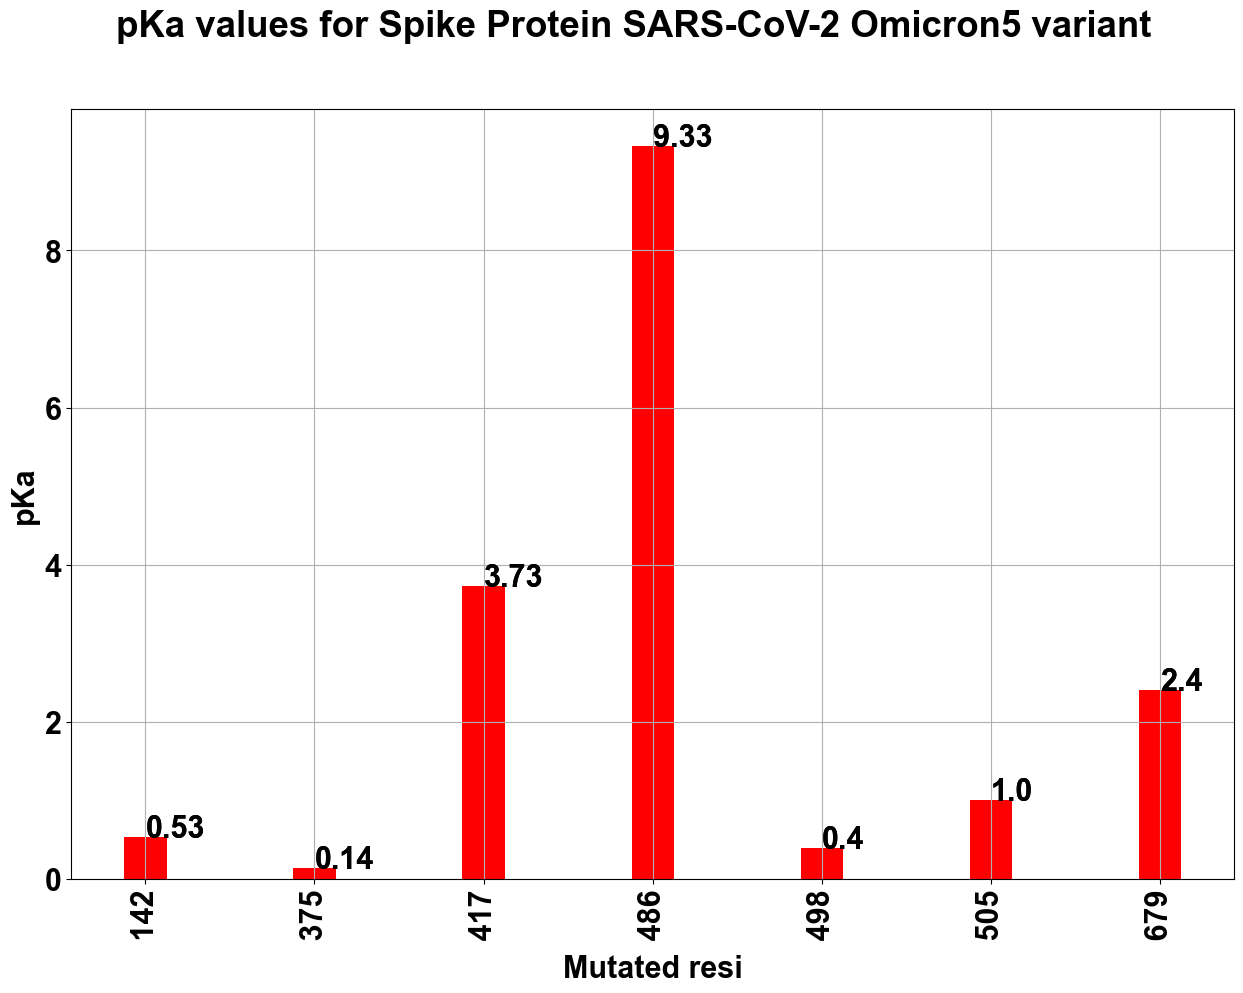

In [18]:
for variant, variant_name in spikes.items():
    if variant_name != "Wild Type":
        mutations = spike_muts_variants[spikes[variant]]
    else:
        mutations = muts_wt
    if variant_name != "Wild Type":
        fig, ax = plt.subplots(figsize = (15,10))
        print(variant_name)
        chain = "A"
        #print(all_extracted_lines[variant])
        #resi =  [int(elem[0][3:7]) for elem in all_extracted_lines[variant]]
        resi =  []
        for elem in all_extracted_lines[variant]:
            try:
                temp = int(elem[0][3:7])
                resi.append(temp)
            finally:
                continue

        idx = np.argsort(resi)
        x = np.array([all_extracted_lines[variant][i][0] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
        #print(x)
        y = np.array([all_extracted_lines[variant][i][1] for i in idx if chain in all_extracted_lines[variant][i][0][7:]])
        x_muts = [elem for elem in x if int(elem[3:7]) in mutations]
        y_muts = [y[i] for i, elem in enumerate(x) if int(elem[3:7]) in mutations]
        aas_var = {int(elem[3:7]): elem[:3] for elem in x if int(elem[3:7]) in mutations}
        plt.grid(True)
        plt.ylabel('pKa', weight='bold')
        plt.xlabel('Mutated resi', weight='bold')
        fig.suptitle('pKa values for Spike Protein SARS-CoV-2 {} variant'.format(variant_name), weight='bold')
        
        texts = []
        index = 0
        n = len(x_muts)
        if n == 1:
            plt.xlim((str(int(x_muts[0][3:7])-100), str(int(x_muts[0][3:7])+100)))
            plt.xticks((str(int(x_muts[0][3:7])-100), str(int(x_muts[0][3:7])), str(int(x_muts[0][3:7])+100)))
            plt.bar(x_muts[0][3:7], y_muts[0], color = "r", alpha=1.0, width=0.5, align='center', label = "_nolegend_")
        else:
            for i, x_mut in enumerate(x_muts):
                y_mut = y_muts[i]
                aa_wt = aas_wt[int(x_mut[3:7])]
                aa_variant = aas_var[int(x_mut[3:7])]

                if y_mut != 0:
                    if index == 0:
                        plt.bar(x_mut[3:7], y_mut, color = "r", alpha=1.0, width=0.25, align='center', label = "_nolegend_")
                    else:
                        plt.bar(x_mut[3:7], y_mut, color = "r", alpha=1.0, width=0.25, align='center', label = "_nolegend_")

                    index += 1
                    texts.append(plt.text(i, y_mut,  round(y_mut, 3)))
                    plt.annotate(xy=(i,y_mut),  text=round(y_mut, 3))
        if len(texts) > 0:
            #adjust_text(texts, x = np.arange(0, len(x_muts)), y = y_muts, color = "r", only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='k', lw=1.0))
            plt.xticks(rotation='vertical')
            plt.savefig("Figures\Pka_plot\{}_pka.jpg".format(variant_name), dpi = 600)
            plt.show()

In [17]:
texts

[Text(CYS 152 A, -2, 'CYS 152 A'), Text(ARG 452 A, -2, 'ARG 452 A')]

In [6]:
x

array(['TYR  28 A', 'ARG  34 A', 'TYR  37 A', 'TYR  38 A', 'LYS  41 A',
       'ARG  44 A', 'ASP  53 A', 'LYS  77 A', 'ARG  78 A', 'ASP  80 A',
       'ASP  88 A', 'TYR  91 A', 'GLU  96 A', 'LYS  97 A', 'ARG 102 A',
       'ASP 111 A', 'LYS 113 A', 'LYS 129 A', 'GLU 132 A', 'CYS 136 A',
       'ASP 138 A', 'TYR 144 A', 'TYR 145 A', 'LYS 147 A', 'LYS 150 A',
       'GLU 154 A', 'GLU 156 A', 'ARG 158 A', 'TYR 160 A', 'GLU 169 A',
       'TYR 170 A', 'ASP 178 A', 'GLU 180 A', 'LYS 182 A', 'LYS 187 A',
       'ARG 190 A', 'GLU 191 A', 'LYS 195 A', 'ASP 198 A', 'TYR 200 A',
       'LYS 202 A', 'TYR 204 A', 'LYS 206 A', 'ARG 214 A', 'ASP 215 A',
       'GLU 224 A', 'ASP 228 A', 'ARG 237 A', 'ARG 246 A', 'TYR 248 A',
       'ASP 253 A', 'TYR 265 A', 'TYR 266 A', 'TYR 269 A', 'ARG 273 A',
       'LYS 278 A', 'TYR 279 A', 'GLU 281 A', 'ASP 287 A', 'ASP 290 A',
       'ASP 294 A', 'GLU 298 A', 'LYS 300 A', 'LYS 304 A', 'GLU 309 A',
       'LYS 310 A', 'TYR 313 A', 'ARG 319 A', 'GLU 324 A', 'ARG 

In [1]:
#FROM US-ALIGN
temp = {'Alfa.pdb vs Alfa.pdb': 1.0, 'Alfa.pdb vs Beta.pdb': '0.94571', 'Beta.pdb vs Alfa.pdb': '0.94571', 'Alfa.pdb vs Delt.pdb': '0.94651', 'Delt.pdb vs Alfa.pdb': '0.94651', 'Alfa.pdb vs Epsl.pdb': '0.98173', 'Epsl.pdb vs Alfa.pdb': '0.98173', 'Alfa.pdb vs Eta1.pdb': '1.00000', 'Eta1.pdb vs Alfa.pdb': '1.00000', 'Alfa.pdb vs Gamm.pdb': '0.98178', 'Gamm.pdb vs Alfa.pdb': '0.98178', 'Alfa.pdb vs Ihu1.pdb': '0.97529', 'Ihu1.pdb vs Alfa.pdb': '0.97529', 'Alfa.pdb vs Iot2.pdb': '0.98180', 'Iot2.pdb vs Alfa.pdb': '0.98180', 'Alfa.pdb vs Iota.pdb': '0.93331', 'Iota.pdb vs Alfa.pdb': '0.93331', 'Alfa.pdb vs Kapp.pdb': '0.96617', 'Kapp.pdb vs Alfa.pdb': '0.96617', 'Alfa.pdb vs Mt02.pdb': '1.00000', 'Mt02.pdb vs Alfa.pdb': '1.00000', 'Alfa.pdb vs Mt06.pdb': '0.78262', 'Mt06.pdb vs Alfa.pdb': '0.78262', 'Alfa.pdb vs Mt07.pdb': '0.78196', 'Mt07.pdb vs Alfa.pdb': '0.78196', 'Alfa.pdb vs Mt09.pdb': '0.77774', 'Mt09.pdb vs Alfa.pdb': '0.77774', 'Alfa.pdb vs Mt10.pdb': '0.78343', 'Mt10.pdb vs Alfa.pdb': '0.78343', 'Alfa.pdb vs Mt13.pdb': '0.96617', 'Mt13.pdb vs Alfa.pdb': '0.96617', 'Alfa.pdb vs Mt14.pdb': '0.77930', 'Mt14.pdb vs Alfa.pdb': '0.77930', 'Alfa.pdb vs Omi1.pdb': '0.99568', 'Omi1.pdb vs Alfa.pdb': '0.99568', 'Alfa.pdb vs Omi5.pdb': '0.98067', 'Omi5.pdb vs Alfa.pdb': '0.98067', 'Alfa.pdb vs SPWT.pdb': '0.93331', 'SPWT.pdb vs Alfa.pdb': '0.93331', 'Alfa.pdb vs Zeta.pdb': '0.93331', 'Zeta.pdb vs Alfa.pdb': '0.93331', 'Beta.pdb vs Beta.pdb': 1.0, 'Beta.pdb vs Delt.pdb': '0.95350', 'Delt.pdb vs Beta.pdb': '0.95350', 'Beta.pdb vs Epsl.pdb': '0.93361', 'Epsl.pdb vs Beta.pdb': '0.93361', 'Beta.pdb vs Eta1.pdb': '0.94488', 'Eta1.pdb vs Beta.pdb': '0.94488', 'Beta.pdb vs Gamm.pdb': '0.93360', 'Gamm.pdb vs Beta.pdb': '0.93360', 'Beta.pdb vs Ihu1.pdb': '0.93094', 'Ihu1.pdb vs Beta.pdb': '0.93094', 'Beta.pdb vs Iot2.pdb': '0.93364', 'Iot2.pdb vs Beta.pdb': '0.93364', 'Beta.pdb vs Iota.pdb': '0.91757', 'Iota.pdb vs Beta.pdb': '0.91757', 'Beta.pdb vs Kapp.pdb': '0.95559', 'Kapp.pdb vs Beta.pdb': '0.95559', 'Beta.pdb vs Mt02.pdb': '0.94488', 'Mt02.pdb vs Beta.pdb': '0.94488', 'Beta.pdb vs Mt06.pdb': '0.77941', 'Mt06.pdb vs Beta.pdb': '0.77941', 'Beta.pdb vs Mt07.pdb': '0.77950', 'Mt07.pdb vs Beta.pdb': '0.77950', 'Beta.pdb vs Mt09.pdb': '0.77443', 'Mt09.pdb vs Beta.pdb': '0.77443', 'Beta.pdb vs Mt10.pdb': '0.77906', 'Mt10.pdb vs Beta.pdb': '0.77906', 'Beta.pdb vs Mt13.pdb': '0.95559', 'Mt13.pdb vs Beta.pdb': '0.95559', 'Beta.pdb vs Mt14.pdb': '0.77506', 'Mt14.pdb vs Beta.pdb': '0.77506', 'Beta.pdb vs Omi1.pdb': '0.94283', 'Omi1.pdb vs Beta.pdb': '0.94283', 'Beta.pdb vs Omi5.pdb': '0.93060', 'Omi5.pdb vs Beta.pdb': '0.93060', 'Beta.pdb vs SPWT.pdb': '0.91757', 'SPWT.pdb vs Beta.pdb': '0.91757', 'Beta.pdb vs Zeta.pdb': '0.91757', 'Zeta.pdb vs Beta.pdb': '0.91757', 'Delt.pdb vs Delt.pdb': 1.0, 'Delt.pdb vs Epsl.pdb': '0.93419', 'Epsl.pdb vs Delt.pdb': '0.93419', 'Delt.pdb vs Eta1.pdb': '0.94568', 'Eta1.pdb vs Delt.pdb': '0.94568', 'Delt.pdb vs Gamm.pdb': '0.93429', 'Gamm.pdb vs Delt.pdb': '0.93429', 'Delt.pdb vs Ihu1.pdb': '0.93234', 'Ihu1.pdb vs Delt.pdb': '0.93234', 'Delt.pdb vs Iot2.pdb': '0.93432', 'Iot2.pdb vs Delt.pdb': '0.93432', 'Delt.pdb vs Iota.pdb': '0.91211', 'Iota.pdb vs Delt.pdb': '0.91211', 'Delt.pdb vs Kapp.pdb': '0.96412', 'Kapp.pdb vs Delt.pdb': '0.96412', 'Delt.pdb vs Mt02.pdb': '0.94568', 'Mt02.pdb vs Delt.pdb': '0.94568', 'Delt.pdb vs Mt06.pdb': '0.77213', 'Mt06.pdb vs Delt.pdb': '0.77213', 'Delt.pdb vs Mt07.pdb': '0.77196', 'Mt07.pdb vs Delt.pdb': '0.77196', 'Delt.pdb vs Mt09.pdb': '0.77622', 'Mt09.pdb vs Delt.pdb': '0.77622', 'Delt.pdb vs Mt10.pdb': '0.77191', 'Mt10.pdb vs Delt.pdb': '0.77191', 'Delt.pdb vs Mt13.pdb': '0.96412', 'Mt13.pdb vs Delt.pdb': '0.96412', 'Delt.pdb vs Mt14.pdb': '0.77515', 'Mt14.pdb vs Delt.pdb': '0.77515', 'Delt.pdb vs Omi1.pdb': '0.94404', 'Omi1.pdb vs Delt.pdb': '0.94404', 'Delt.pdb vs Omi5.pdb': '0.93185', 'Omi5.pdb vs Delt.pdb': '0.93185', 'Delt.pdb vs SPWT.pdb': '0.91211', 'SPWT.pdb vs Delt.pdb': '0.91211', 'Delt.pdb vs Zeta.pdb': '0.91211', 'Zeta.pdb vs Delt.pdb': '0.91211', 'Epsl.pdb vs Epsl.pdb': 1.0, 'Epsl.pdb vs Eta1.pdb': '0.97913', 'Eta1.pdb vs Epsl.pdb': '0.97913', 'Epsl.pdb vs Gamm.pdb': '0.99952', 'Gamm.pdb vs Epsl.pdb': '0.99952', 'Epsl.pdb vs Ihu1.pdb': '0.99049', 'Ihu1.pdb vs Epsl.pdb': '0.99049', 'Epsl.pdb vs Iot2.pdb': '0.99956', 'Iot2.pdb vs Epsl.pdb': '0.99956', 'Epsl.pdb vs Iota.pdb': '0.92915', 'Iota.pdb vs Epsl.pdb': '0.92915', 'Epsl.pdb vs Kapp.pdb': '0.94971', 'Kapp.pdb vs Epsl.pdb': '0.94971', 'Epsl.pdb vs Mt02.pdb': '0.97913', 'Mt02.pdb vs Epsl.pdb': '0.97913', 'Epsl.pdb vs Mt06.pdb': '0.77591', 'Mt06.pdb vs Epsl.pdb': '0.77591', 'Epsl.pdb vs Mt07.pdb': '0.77565', 'Mt07.pdb vs Epsl.pdb': '0.77565', 'Epsl.pdb vs Mt09.pdb': '0.77120', 'Mt09.pdb vs Epsl.pdb': '0.77120', 'Epsl.pdb vs Mt10.pdb': '0.77639', 'Mt10.pdb vs Epsl.pdb': '0.77639', 'Epsl.pdb vs Mt13.pdb': '0.94971', 'Mt13.pdb vs Epsl.pdb': '0.94971', 'Epsl.pdb vs Mt14.pdb': '0.77292', 'Mt14.pdb vs Epsl.pdb': '0.77292', 'Epsl.pdb vs Omi1.pdb': '0.97685', 'Omi1.pdb vs Epsl.pdb': '0.97685', 'Epsl.pdb vs Omi5.pdb': '0.99598', 'Omi5.pdb vs Epsl.pdb': '0.99598', 'Epsl.pdb vs SPWT.pdb': '0.92915', 'SPWT.pdb vs Epsl.pdb': '0.92915', 'Epsl.pdb vs Zeta.pdb': '0.92915', 'Zeta.pdb vs Epsl.pdb': '0.92915', 'Eta1.pdb vs Eta1.pdb': 1.0, 'Eta1.pdb vs Gamm.pdb': '0.98178', 'Gamm.pdb vs Eta1.pdb': '0.98178', 'Eta1.pdb vs Ihu1.pdb': '0.97529', 'Ihu1.pdb vs Eta1.pdb': '0.97529', 'Eta1.pdb vs Iot2.pdb': '0.98180', 'Iot2.pdb vs Eta1.pdb': '0.98180', 'Eta1.pdb vs Iota.pdb': '0.93331', 'Iota.pdb vs Eta1.pdb': '0.93331', 'Eta1.pdb vs Kapp.pdb': '0.96617', 'Kapp.pdb vs Eta1.pdb': '0.96617', 'Eta1.pdb vs Mt02.pdb': '1.00000', 'Mt02.pdb vs Eta1.pdb': '1.00000', 'Eta1.pdb vs Mt06.pdb': '0.78262', 'Mt06.pdb vs Eta1.pdb': '0.78262', 'Eta1.pdb vs Mt07.pdb': '0.78196', 'Mt07.pdb vs Eta1.pdb': '0.78196', 'Eta1.pdb vs Mt09.pdb': '0.77774', 'Mt09.pdb vs Eta1.pdb': '0.77774', 'Eta1.pdb vs Mt10.pdb': '0.78343', 'Mt10.pdb vs Eta1.pdb': '0.78343', 'Eta1.pdb vs Mt13.pdb': '0.96617', 'Mt13.pdb vs Eta1.pdb': '0.96617', 'Eta1.pdb vs Mt14.pdb': '0.77930', 'Mt14.pdb vs Eta1.pdb': '0.77930', 'Eta1.pdb vs Omi1.pdb': '0.99568', 'Omi1.pdb vs Eta1.pdb': '0.99568', 'Eta1.pdb vs Omi5.pdb': '0.98067', 'Omi5.pdb vs Eta1.pdb': '0.98067', 'Eta1.pdb vs SPWT.pdb': '0.93331', 'SPWT.pdb vs Eta1.pdb': '0.93331', 'Eta1.pdb vs Zeta.pdb': '0.93331', 'Zeta.pdb vs Eta1.pdb': '0.93331', 'Gamm.pdb vs Gamm.pdb': 1.0, 'Gamm.pdb vs Ihu1.pdb': '0.98961', 'Ihu1.pdb vs Gamm.pdb': '0.98961', 'Gamm.pdb vs Iot2.pdb': '0.99861', 'Iot2.pdb vs Gamm.pdb': '0.99861', 'Gamm.pdb vs Iota.pdb': '0.92878', 'Iota.pdb vs Gamm.pdb': '0.92878', 'Gamm.pdb vs Kapp.pdb': '0.94892', 'Kapp.pdb vs Gamm.pdb': '0.94892', 'Gamm.pdb vs Mt02.pdb': '0.97833', 'Mt02.pdb vs Gamm.pdb': '0.97833', 'Gamm.pdb vs Mt06.pdb': '0.77571', 'Mt06.pdb vs Gamm.pdb': '0.77571', 'Gamm.pdb vs Mt07.pdb': '0.77585', 'Mt07.pdb vs Gamm.pdb': '0.77585', 'Gamm.pdb vs Mt09.pdb': '0.77106', 'Mt09.pdb vs Gamm.pdb': '0.77106', 'Gamm.pdb vs Mt10.pdb': '0.77615', 'Mt10.pdb vs Gamm.pdb': '0.77615', 'Gamm.pdb vs Mt13.pdb': '0.94892', 'Mt13.pdb vs Gamm.pdb': '0.94892', 'Gamm.pdb vs Mt14.pdb': '0.77274', 'Mt14.pdb vs Gamm.pdb': '0.77274', 'Gamm.pdb vs Omi1.pdb': '0.97612', 'Omi1.pdb vs Gamm.pdb': '0.97612', 'Gamm.pdb vs Omi5.pdb': '0.99587', 'Omi5.pdb vs Gamm.pdb': '0.99587', 'Gamm.pdb vs SPWT.pdb': '0.92878', 'SPWT.pdb vs Gamm.pdb': '0.92878', 'Gamm.pdb vs Zeta.pdb': '0.92878', 'Zeta.pdb vs Gamm.pdb': '0.92878', 'Ihu1.pdb vs Ihu1.pdb': 1.0, 'Ihu1.pdb vs Iot2.pdb': '0.99853', 'Iot2.pdb vs Ihu1.pdb': '0.99853', 'Ihu1.pdb vs Iota.pdb': '0.93307', 'Iota.pdb vs Ihu1.pdb': '0.93307', 'Ihu1.pdb vs Kapp.pdb': '0.95469', 'Kapp.pdb vs Ihu1.pdb': '0.95469', 'Ihu1.pdb vs Mt02.pdb': '0.98049', 'Mt02.pdb vs Ihu1.pdb': '0.98049', 'Ihu1.pdb vs Mt06.pdb': '0.77680', 'Mt06.pdb vs Ihu1.pdb': '0.77680', 'Ihu1.pdb vs Mt07.pdb': '0.77690', 'Mt07.pdb vs Ihu1.pdb': '0.77690', 'Ihu1.pdb vs Mt09.pdb': '0.77211', 'Mt09.pdb vs Ihu1.pdb': '0.77211', 'Ihu1.pdb vs Mt10.pdb': '0.77729', 'Mt10.pdb vs Ihu1.pdb': '0.77729', 'Ihu1.pdb vs Mt13.pdb': '0.95469', 'Mt13.pdb vs Ihu1.pdb': '0.95469', 'Ihu1.pdb vs Mt14.pdb': '0.77333', 'Mt14.pdb vs Ihu1.pdb': '0.77333', 'Ihu1.pdb vs Omi1.pdb': '0.97950', 'Omi1.pdb vs Ihu1.pdb': '0.97950', 'Ihu1.pdb vs Omi5.pdb': '0.99515', 'Omi5.pdb vs Ihu1.pdb': '0.99515', 'Ihu1.pdb vs SPWT.pdb': '0.93307', 'SPWT.pdb vs Ihu1.pdb': '0.93307', 'Ihu1.pdb vs Zeta.pdb': '0.93307', 'Zeta.pdb vs Ihu1.pdb': '0.93307', 'Iot2.pdb vs Iot2.pdb': 1.0, 'Iot2.pdb vs Iota.pdb': '0.92933', 'Iota.pdb vs Iot2.pdb': '0.92933', 'Iot2.pdb vs Kapp.pdb': '0.94979', 'Kapp.pdb vs Iot2.pdb': '0.94979', 'Iot2.pdb vs Mt02.pdb': '0.97921', 'Mt02.pdb vs Iot2.pdb': '0.97921', 'Iot2.pdb vs Mt06.pdb': '0.77612', 'Mt06.pdb vs Iot2.pdb': '0.77612', 'Iot2.pdb vs Mt07.pdb': '0.77622', 'Mt07.pdb vs Iot2.pdb': '0.77622', 'Iot2.pdb vs Mt09.pdb': '0.77148', 'Mt09.pdb vs Iot2.pdb': '0.77148', 'Iot2.pdb vs Mt10.pdb': '0.77694', 'Mt10.pdb vs Iot2.pdb': '0.77694', 'Iot2.pdb vs Mt13.pdb': '0.94979', 'Mt13.pdb vs Iot2.pdb': '0.94979', 'Iot2.pdb vs Mt14.pdb': '0.77306', 'Mt14.pdb vs Iot2.pdb': '0.77306', 'Iot2.pdb vs Omi1.pdb': '0.97707', 'Omi1.pdb vs Iot2.pdb': '0.97707', 'Iot2.pdb vs Omi5.pdb': '0.99602', 'Omi5.pdb vs Iot2.pdb': '0.99602', 'Iot2.pdb vs SPWT.pdb': '0.92933', 'SPWT.pdb vs Iot2.pdb': '0.92933', 'Iot2.pdb vs Zeta.pdb': '0.92933', 'Zeta.pdb vs Iot2.pdb': '0.92933', 'Iota.pdb vs Iota.pdb': 1.0, 'Iota.pdb vs Kapp.pdb': '0.92051', 'Kapp.pdb vs Iota.pdb': '0.92051', 'Iota.pdb vs Mt02.pdb': '0.93012', 'Mt02.pdb vs Iota.pdb': '0.93012', 'Iota.pdb vs Mt06.pdb': '0.75493', 'Mt06.pdb vs Iota.pdb': '0.75493', 'Iota.pdb vs Mt07.pdb': '0.75551', 'Mt07.pdb vs Iota.pdb': '0.75551', 'Iota.pdb vs Mt09.pdb': '0.75482', 'Mt09.pdb vs Iota.pdb': '0.75482', 'Iota.pdb vs Mt10.pdb': '0.75767', 'Mt10.pdb vs Iota.pdb': '0.75767', 'Iota.pdb vs Mt13.pdb': '0.92051', 'Mt13.pdb vs Iota.pdb': '0.92051', 'Iota.pdb vs Mt14.pdb': '0.75483', 'Mt14.pdb vs Iota.pdb': '0.75483', 'Iota.pdb vs Omi1.pdb': '0.92695', 'Omi1.pdb vs Iota.pdb': '0.92695', 'Iota.pdb vs Omi5.pdb': '0.92752', 'Omi5.pdb vs Iota.pdb': '0.92752', 'Iota.pdb vs SPWT.pdb': '1.00000', 'SPWT.pdb vs Iota.pdb': '1.00000', 'Iota.pdb vs Zeta.pdb': '1.00000', 'Zeta.pdb vs Iota.pdb': '1.00000', 'Kapp.pdb vs Kapp.pdb': 1.0, 'Kapp.pdb vs Mt02.pdb': '0.96276', 'Mt02.pdb vs Kapp.pdb': '0.96276', 'Kapp.pdb vs Mt06.pdb': '0.77304', 'Mt06.pdb vs Kapp.pdb': '0.77304', 'Kapp.pdb vs Mt07.pdb': '0.77305', 'Mt07.pdb vs Kapp.pdb': '0.77305', 'Kapp.pdb vs Mt09.pdb': '0.77031', 'Mt09.pdb vs Kapp.pdb': '0.77031', 'Kapp.pdb vs Mt10.pdb': '0.77408', 'Mt10.pdb vs Kapp.pdb': '0.77408', 'Kapp.pdb vs Mt13.pdb': '1.00000', 'Mt13.pdb vs Kapp.pdb': '1.00000', 'Kapp.pdb vs Mt14.pdb': '0.77071', 'Mt14.pdb vs Kapp.pdb': '0.77071', 'Kapp.pdb vs Omi1.pdb': '0.96044', 'Omi1.pdb vs Kapp.pdb': '0.96044', 'Kapp.pdb vs Omi5.pdb': '0.94628', 'Omi5.pdb vs Kapp.pdb': '0.94628', 'Kapp.pdb vs SPWT.pdb': '0.92051', 'SPWT.pdb vs Kapp.pdb': '0.92051', 'Kapp.pdb vs Zeta.pdb': '0.92051', 'Zeta.pdb vs Kapp.pdb': '0.92051', 'Mt02.pdb vs Mt02.pdb': 1.0, 'Mt02.pdb vs Mt06.pdb': '0.78262', 'Mt06.pdb vs Mt02.pdb': '0.78262', 'Mt02.pdb vs Mt07.pdb': '0.78196', 'Mt07.pdb vs Mt02.pdb': '0.78196', 'Mt02.pdb vs Mt09.pdb': '0.77774', 'Mt09.pdb vs Mt02.pdb': '0.77774', 'Mt02.pdb vs Mt10.pdb': '0.78343', 'Mt10.pdb vs Mt02.pdb': '0.78343', 'Mt02.pdb vs Mt13.pdb': '0.96617', 'Mt13.pdb vs Mt02.pdb': '0.96617', 'Mt02.pdb vs Mt14.pdb': '0.77930', 'Mt14.pdb vs Mt02.pdb': '0.77930', 'Mt02.pdb vs Omi1.pdb': '0.99568', 'Omi1.pdb vs Mt02.pdb': '0.99568', 'Mt02.pdb vs Omi5.pdb': '0.98067', 'Omi5.pdb vs Mt02.pdb': '0.98067', 'Mt02.pdb vs SPWT.pdb': '0.93331', 'SPWT.pdb vs Mt02.pdb': '0.93331', 'Mt02.pdb vs Zeta.pdb': '0.93331', 'Zeta.pdb vs Mt02.pdb': '0.93331', 'Mt06.pdb vs Mt06.pdb': 1.0, 'Mt06.pdb vs Mt07.pdb': '0.99987', 'Mt07.pdb vs Mt06.pdb': '0.99987', 'Mt06.pdb vs Mt09.pdb': '0.98090', 'Mt09.pdb vs Mt06.pdb': '0.98090', 'Mt06.pdb vs Mt10.pdb': '0.98452', 'Mt10.pdb vs Mt06.pdb': '0.98452', 'Mt06.pdb vs Mt13.pdb': '0.76531', 'Mt13.pdb vs Mt06.pdb': '0.76531', 'Mt06.pdb vs Mt14.pdb': '0.98642', 'Mt14.pdb vs Mt06.pdb': '0.98642', 'Mt06.pdb vs Omi1.pdb': '0.76972', 'Omi1.pdb vs Mt06.pdb': '0.76972', 'Mt06.pdb vs Omi5.pdb': '0.76589', 'Omi5.pdb vs Mt06.pdb': '0.76589', 'Mt06.pdb vs SPWT.pdb': '0.74743', 'SPWT.pdb vs Mt06.pdb': '0.74743', 'Mt06.pdb vs Zeta.pdb': '0.74743', 'Zeta.pdb vs Mt06.pdb': '0.74743', 'Mt07.pdb vs Mt07.pdb': 1.0, 'Mt07.pdb vs Mt09.pdb': '0.98068', 'Mt09.pdb vs Mt07.pdb': '0.98068', 'Mt07.pdb vs Mt10.pdb': '0.98442', 'Mt10.pdb vs Mt07.pdb': '0.98442', 'Mt07.pdb vs Mt13.pdb': '0.76532', 'Mt13.pdb vs Mt07.pdb': '0.76532', 'Mt07.pdb vs Mt14.pdb': '0.98609', 'Mt14.pdb vs Mt07.pdb': '0.98609', 'Mt07.pdb vs Omi1.pdb': '0.76985', 'Omi1.pdb vs Mt07.pdb': '0.76985', 'Mt07.pdb vs Omi5.pdb': '0.76613', 'Omi5.pdb vs Mt07.pdb': '0.76613', 'Mt07.pdb vs SPWT.pdb': '0.74800', 'SPWT.pdb vs Mt07.pdb': '0.74800', 'Mt07.pdb vs Zeta.pdb': '0.74800', 'Zeta.pdb vs Mt07.pdb': '0.74800', 'Mt09.pdb vs Mt09.pdb': 1.0, 'Mt09.pdb vs Mt10.pdb': '0.98638', 'Mt10.pdb vs Mt09.pdb': '0.98638', 'Mt09.pdb vs Mt13.pdb': '0.76450', 'Mt13.pdb vs Mt09.pdb': '0.76450', 'Mt09.pdb vs Mt14.pdb': '0.99712', 'Mt14.pdb vs Mt09.pdb': '0.99712', 'Mt09.pdb vs Omi1.pdb': '0.76786', 'Omi1.pdb vs Mt09.pdb': '0.76786', 'Mt09.pdb vs Omi5.pdb': '0.76280', 'Omi5.pdb vs Mt09.pdb': '0.76280', 'Mt09.pdb vs SPWT.pdb': '0.74918', 'SPWT.pdb vs Mt09.pdb': '0.74918', 'Mt09.pdb vs Zeta.pdb': '0.74918', 'Zeta.pdb vs Mt09.pdb': '0.74918', 'Mt10.pdb vs Mt10.pdb': 1.0, 'Mt10.pdb vs Mt13.pdb': '0.76825', 'Mt13.pdb vs Mt10.pdb': '0.76825', 'Mt10.pdb vs Mt14.pdb': '0.98360', 'Mt14.pdb vs Mt10.pdb': '0.98360', 'Mt10.pdb vs Omi1.pdb': '0.77243', 'Omi1.pdb vs Mt10.pdb': '0.77243', 'Mt10.pdb vs Omi5.pdb': '0.76798', 'Omi5.pdb vs Mt10.pdb': '0.76798', 'Mt10.pdb vs SPWT.pdb': '0.75201', 'SPWT.pdb vs Mt10.pdb': '0.75201', 'Mt10.pdb vs Zeta.pdb': '0.75201', 'Zeta.pdb vs Mt10.pdb': '0.75201', 'Mt13.pdb vs Mt13.pdb': 1.0, 'Mt13.pdb vs Mt14.pdb': '0.77071', 'Mt14.pdb vs Mt13.pdb': '0.77071', 'Mt13.pdb vs Omi1.pdb': '0.96044', 'Omi1.pdb vs Mt13.pdb': '0.96044', 'Mt13.pdb vs Omi5.pdb': '0.94628', 'Omi5.pdb vs Mt13.pdb': '0.94628', 'Mt13.pdb vs SPWT.pdb': '0.92051', 'SPWT.pdb vs Mt13.pdb': '0.92051', 'Mt13.pdb vs Zeta.pdb': '0.92051', 'Zeta.pdb vs Mt13.pdb': '0.92051', 'Mt14.pdb vs Mt14.pdb': 1.0, 'Mt14.pdb vs Omi1.pdb': '0.76726', 'Omi1.pdb vs Mt14.pdb': '0.76726', 'Mt14.pdb vs Omi5.pdb': '0.76300', 'Omi5.pdb vs Mt14.pdb': '0.76300', 'Mt14.pdb vs SPWT.pdb': '0.74733', 'SPWT.pdb vs Mt14.pdb': '0.74733', 'Mt14.pdb vs Zeta.pdb': '0.74733', 'Zeta.pdb vs Mt14.pdb': '0.74733', 'Omi1.pdb vs Omi1.pdb': 1.0, 'Omi1.pdb vs Omi5.pdb': '0.98042', 'Omi5.pdb vs Omi1.pdb': '0.98042', 'Omi1.pdb vs SPWT.pdb': '0.93252', 'SPWT.pdb vs Omi1.pdb': '0.93252', 'Omi1.pdb vs Zeta.pdb': '0.93252', 'Zeta.pdb vs Omi1.pdb': '0.93252', 'Omi5.pdb vs Omi5.pdb': 1.0, 'Omi5.pdb vs SPWT.pdb': '0.92990', 'SPWT.pdb vs Omi5.pdb': '0.92990', 'Omi5.pdb vs Zeta.pdb': '0.92990', 'Zeta.pdb vs Omi5.pdb': '0.92990', 'SPWT.pdb vs SPWT.pdb': 1.0, 'SPWT.pdb vs Zeta.pdb': '1.00000', 'Zeta.pdb vs SPWT.pdb': '1.00000', 'Zeta.pdb vs Zeta.pdb': 1.0}

In [11]:
temp_new = {}
labels = []
spikes = np.array(list(spikes))
for key in temp.keys():
    var1 = str(key.split(" vs ")[0][:-4])
    var2 = str(key.split(" vs ")[1][:-4])
    if var1 in spikes and var2 in spikes:
        temp_new[key] = temp[key]
        i = np.argwhere(spikes == var1)[0][0]
        name1 = list(spike_muts_variants.keys())[i]
        j = np.argwhere(spikes == var2)[0][0]
        name2 = list(spike_muts_variants.keys())[j]
        if name1 not in labels:
            labels.append(name1)
        if name2 not in labels:
            labels.append(name2)

labels = np.array(labels)
labels

array(['Alpha', 'Beta', 'Delta', 'Epsilon', 'Eta', 'Gamma', 'Ihu',
       'Iota2', 'Iota1', 'Kappa', 'Omicron1', 'Omicron5', 'Wild Type',
       'Zeta'], dtype='<U9')

In [12]:
pdb_dir = "Data\\PDB\\"
N = len(labels)
array = np.zeros((N, N))
for i, (key, value) in enumerate(temp_new.items()):
    var1 = key.split(" vs ")[0][:-4]
    var2 = key.split(" vs ")[1][:-4]
    i = np.argwhere(spikes == var1)[0][0]
    j = np.argwhere(spikes == var2)[0][0]
    name1 = list(spike_muts_variants.keys())[i]
    name2 = list(spike_muts_variants.keys())[j]
    i = np.argwhere(labels == name1)[0][0]
    j = np.argwhere(labels == name2)[0][0]
    value = float(value)
    array[i][j] = value
    
array

array([[1.     , 0.94571, 0.94651, 0.98173, 1.     , 0.98178, 0.97529,
        0.9818 , 0.93331, 0.96617, 0.99568, 0.98067, 0.93331, 0.93331],
       [0.94571, 1.     , 0.9535 , 0.93361, 0.94488, 0.9336 , 0.93094,
        0.93364, 0.91757, 0.95559, 0.94283, 0.9306 , 0.91757, 0.91757],
       [0.94651, 0.9535 , 1.     , 0.93419, 0.94568, 0.93429, 0.93234,
        0.93432, 0.91211, 0.96412, 0.94404, 0.93185, 0.91211, 0.91211],
       [0.98173, 0.93361, 0.93419, 1.     , 0.97913, 0.99952, 0.99049,
        0.99956, 0.92915, 0.94971, 0.97685, 0.99598, 0.92915, 0.92915],
       [1.     , 0.94488, 0.94568, 0.97913, 1.     , 0.98178, 0.97529,
        0.9818 , 0.93331, 0.96617, 0.99568, 0.98067, 0.93331, 0.93331],
       [0.98178, 0.9336 , 0.93429, 0.99952, 0.98178, 1.     , 0.98961,
        0.99861, 0.92878, 0.94892, 0.97612, 0.99587, 0.92878, 0.92878],
       [0.97529, 0.93094, 0.93234, 0.99049, 0.97529, 0.98961, 1.     ,
        0.99853, 0.93307, 0.95469, 0.9795 , 0.99515, 0.93307, 0.93307],

In [13]:
import os 
import pandas as pd 

pdb_dir = "Data\\PDB\\"
df_tm_scores = pd.DataFrame(array, columns = labels, index = labels)
df_tm_scores

,Alpha,Beta,Delta,Epsilon,Eta,Gamma,Ihu,Iota2,Iota1,Kappa,Omicron1,Omicron5,Wild Type,Zeta
Alpha,1.00000,0.94571,0.94651,0.98173,1.00000,0.98178,0.97529,0.98180,0.93331,0.96617,0.99568,0.98067,0.93331,0.93331
Beta,0.94571,1.00000,0.95350,0.93361,0.94488,0.93360,0.93094,0.93364,0.91757,0.95559,0.94283,0.93060,0.91757,0.91757
Delta,0.94651,0.95350,1.00000,0.93419,0.94568,0.93429,0.93234,0.93432,0.91211,0.96412,0.94404,0.93185,0.91211,0.91211
Epsilon,0.98173,0.93361,0.93419,1.00000,0.97913,0.99952,0.99049,0.99956,0.92915,0.94971,0.97685,0.99598,0.92915,0.92915
Eta,1.00000,0.94488,0.94568,0.97913,1.00000,0.98178,0.97529,0.98180,0.93331,0.96617,0.99568,0.98067,0.93331,0.93331
Gamma,0.98178,0.93360,0.93429,0.99952,0.98178,1.00000,0.98961,0.99861,0.92878,0.94892,0.97612,0.99587,0.92878,0.92878
Ihu,0.97529,0.93094,0.93234,0.99049,0.97529,0.98961,1.00000,0.99853,0.93307,0.95469,0.97950,0.99515,0.93307,0.93307
Iota2,0.98180,0.93364,0.93432,0.99956,0.98180,0.99861,0.99853,1.00000,0.92933,0.94979,0.97707,0.99602,0.92933,0.92933
Iota1,0.93331,0.91757,0.91211,0.92915,0.93331,0.92878,0.93307,0.92933,1.00000,0.92051,0.92695,0.92752,1.00000,1.00000
Kappa,0.96617,0.95559,0.96412,0.94971,0.96617,0.94892,0.95469,0.94979,0.92051,1.00000,0.96044,0.94628,0.92051,0.92051


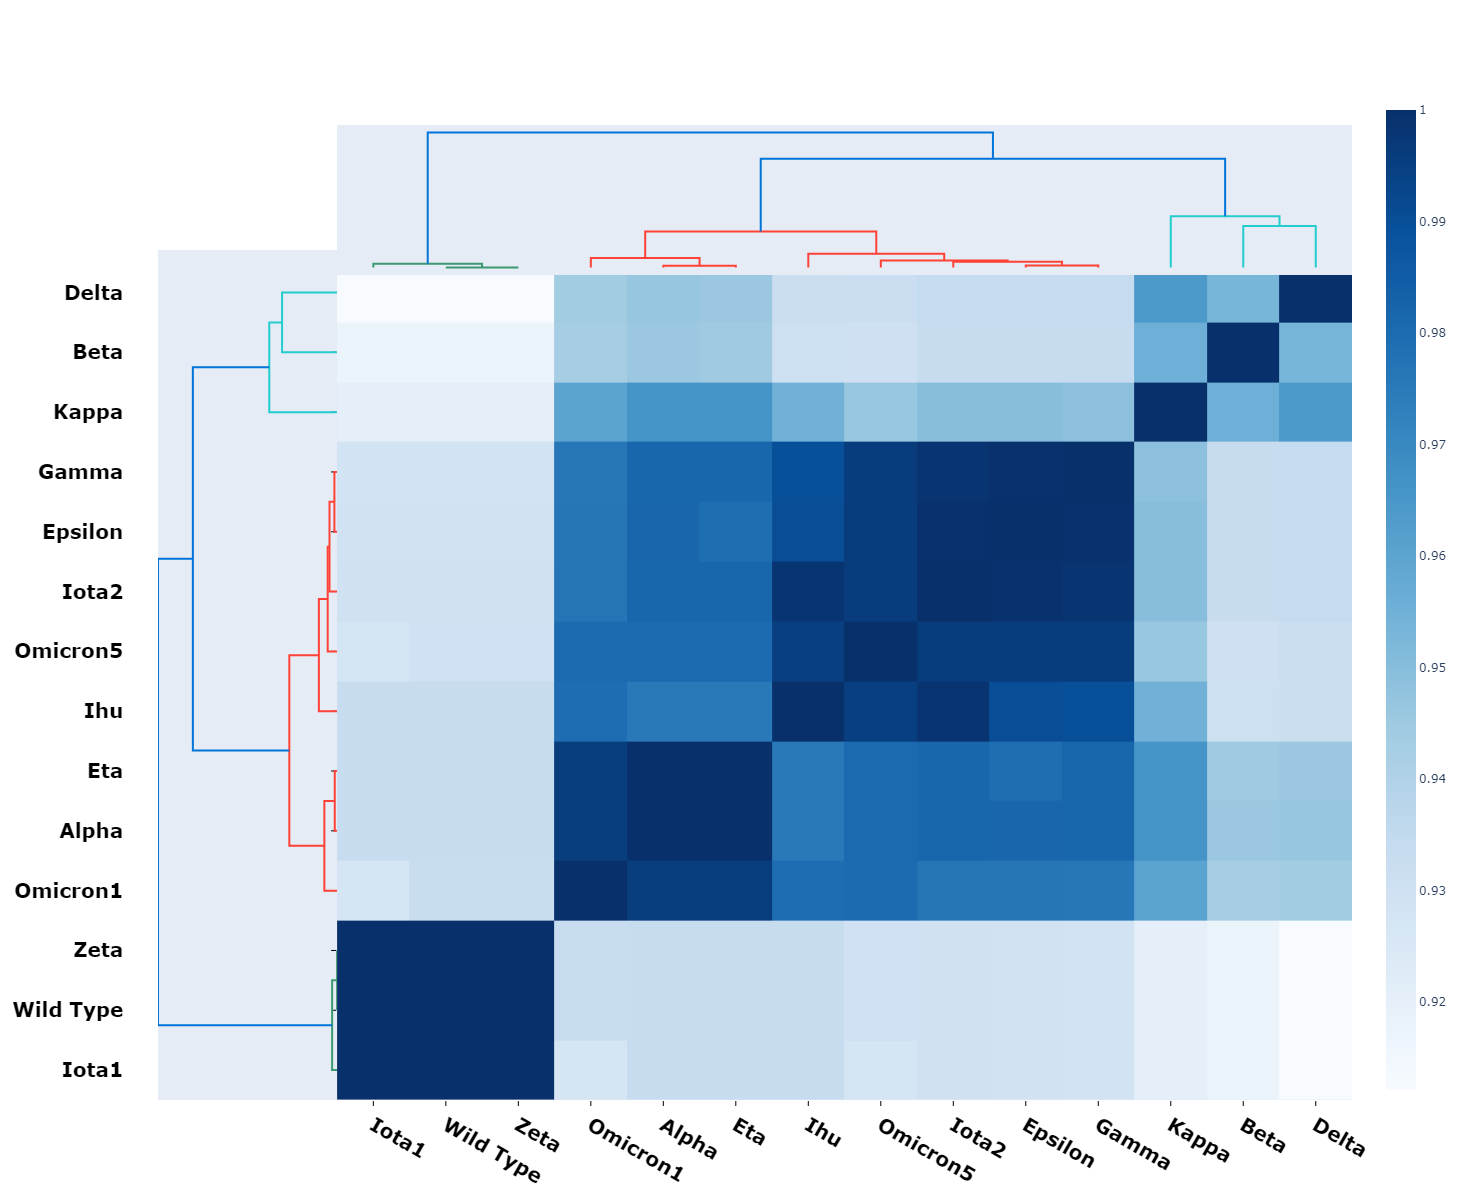

In [27]:
#plot contact sim 
import plotly.figure_factory as ff
from scipy.spatial.distance import pdist, squareform
from plotly import graph_objects as go 
ticksuffix = "                             "
# Initialize figure by creating upper dendrogram

fig = ff.create_dendrogram(array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'
    
# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = [1-array[i, j] for i in range(array.shape[0]) for j in range(array.shape[1]) if i > j]  #pdist(contacts_sim)
heat_data = array #squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = [1-array[i, j] for i in range(array.shape[0]) for j in range(array.shape[1]) if i > j]  #pdist(contacts_sim)
heat_data = array #squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':width*dpi, 'height':width*dpi,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': True, 
                                  'tickmode': "array",
                                  'tickvals': np.arange(5, 215, 10),
                                  'ticktext': "<b>"+fig['layout']['xaxis']['ticktext']+"</b>",
                                  'color': 'black',
                                  'tickfont_size': 20
                        })
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""
                         })

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': True, 
                                  'tickmode': "array",
                                  'tickvals': np.arange(5, 215, 10),
                                  'ticktext': "<b>"+fig['layout']['xaxis']['ticktext']+"</b>"+ticksuffix,
                                  'color': 'black',
                                  'tickfont_size': 20
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks': ""})

# Plot!
fig.show()

#Save
fig.write_image("Figures/TM_Scores/tm_scores.png", engine = "orca", width=width*dpi, height=height*dpi, scale=scale)
fig.write_html("Figures/TM_Scores/tm_scores.html")

In [231]:
#df_tm_scores.to_csv("D:\\Lavoro e Universita\\SARSCoV2_variants_PCN\\Data\\tm_score_variants.csv")

In [11]:
"""
import matplotlib.pyplot as plt 
import numpy as np
from adjustText import adjust_text
fig, ax = plt.subplots(figsize = (15,10))
variant = "Omi1"
wt = "SPWT"
chain = "A"
mutations = spike_muts_variants[spikes[variant]]

resi_wt =  []
for elem in all_extracted_lines[wt]:
    try:
        temp = int(elem[0][3:7])
        resi_wt.append(temp)
    finally:
        continue
idx_wt = np.argsort(resi_wt)

resi_var =  []
for elem in all_extracted_lines[variant]:
    try:
        temp = int(elem[0][3:7])
        resi_var.append(temp)
    finally:
        continue
idx_var = np.argsort(resi_var)
resi_tot = np.union1d(resi_wt, resi_var)

x_var = np.array([all_extracted_lines[variant][i][0][3:]  for i in idx_var if chain in all_extracted_lines[variant][i][0][-1]])
x_wt = np.array([all_extracted_lines[wt][i][0][3:] for i in idx_wt if chain in all_extracted_lines[wt][i][0][-1]])
y_var = np.array([all_extracted_lines[variant][i][1] for i in idx_var if chain in all_extracted_lines[variant][i][0][-1]])
y_wt = np.array([all_extracted_lines[wt][i][1] for i in idx_wt if chain in all_extracted_lines[wt][i][0][-1]])

x_tot, idy = np.unique(np.concatenate((x_wt, x_var)), return_index = True)
y_tot = np.concatenate((y_wt, y_var))
y_tot = y_tot[idy]

x_to_plot = []
y_to_plot = []
for i, x in enumerate(x_tot):
    if x in x_wt:
        iwt = np.argwhere(x == x_wt)[0][0]
        if x in x_var:
            ivar = np.argwhere(x == x_var)[0][0]
            y = y_var[ivar] - y_wt[iwt]
            x_to_plot.append(x)
            y_to_plot.append(y)

y_to_plot = np.array(y_to_plot, dtype=float)

x_muts = [elem for elem in x_to_plot if int(elem[:4]) in mutations]
plt.fill_between(x_to_plot, y_to_plot, where=y_to_plot>0.0, color = "g", alpha=0.7)
plt.fill_between(x_to_plot, y_to_plot, where=y_to_plot<0.0, color = "r", alpha=0.7)
plt.plot(x_to_plot, y_to_plot, color="k", lw=2)
plt.grid(True)
plt.ylabel('PKa')
fig.suptitle('PKa values for Spike Protein SARS-CoV-2 {} variant - Wild Type'.format(variant))
fig.autofmt_xdate()
xticks = [x_to_plot[i] for i in range(0, len(x_to_plot), int(len(x_to_plot)/30))]
ax.set_xticks(xticks)
ax.vlines(x_muts, 0, 1, transform=ax.get_xaxis_transform(), color = "r")
texts = []

for x_mut in x_muts:
    texts.append(plt.text(x_mut, -2, x_mut))
adjust_text(texts, color = "r", only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1.0))
plt.xticks(rotation='vertical')
plt.show()
"""

'\nimport matplotlib.pyplot as plt \nimport numpy as np\nfrom adjustText import adjust_text\nfig, ax = plt.subplots(figsize = (15,10))\nvariant = "Omi1"\nwt = "SPWT"\nchain = "A"\nmutations = spike_muts_variants[spikes[variant]]\n\nresi_wt =  []\nfor elem in all_extracted_lines[wt]:\n    try:\n        temp = int(elem[0][3:7])\n        resi_wt.append(temp)\n    finally:\n        continue\nidx_wt = np.argsort(resi_wt)\n\nresi_var =  []\nfor elem in all_extracted_lines[variant]:\n    try:\n        temp = int(elem[0][3:7])\n        resi_var.append(temp)\n    finally:\n        continue\nidx_var = np.argsort(resi_var)\nresi_tot = np.union1d(resi_wt, resi_var)\n\nx_var = np.array([all_extracted_lines[variant][i][0][3:]  for i in idx_var if chain in all_extracted_lines[variant][i][0][-1]])\nx_wt = np.array([all_extracted_lines[wt][i][0][3:] for i in idx_wt if chain in all_extracted_lines[wt][i][0][-1]])\ny_var = np.array([all_extracted_lines[variant][i][1] for i in idx_var if chain in all_extr

In [27]:
import pymol
from pymol import cmd

In [25]:
pdb_dir = "Data/PDB/"
os.listdir(pdb_dir)

['.vs',
 'Alfa.pdb',
 'Beta.pdb',
 'Delt.pdb',
 'Epsl.pdb',
 'Eta1.pdb',
 'fasta',
 'Gamm.pdb',
 'Ihu1.pdb',
 'Iot2.pdb',
 'Iota.pdb',
 'Kapp.pdb',
 'Mt02.pdb',
 'Mt06.pdb',
 'Mt07.pdb',
 'Mt09.pdb',
 'Mt10.pdb',
 'Mt13.pdb',
 'Mt14.pdb',
 'Omi1.pdb',
 'Omi5.pdb',
 'output.txt',
 'SPWT.pdb',
 'USalign.exe',
 'Zeta.pdb']

In [28]:
domains = {
"NTD": np.arange(14, 305, 1),
#"CT0": np.arange(306, 330, 1),
"RBD":  np.arange(331, 527, 1),
#"CT1": np.arange(528, 590, 1),
#"CT2": np.arange(591, 685, 1),
#"S2S2'": np.arange(686, 815, 1),
#"FP": np.arange(816, 885, 1),
#"FPR": np.arange(886, 911, 1),
#"HR1": np.arange(912, 984, 1),
#"CH": np.arange(985, 1034, 1),
#"CD": np.arange(1035, 1080, 1),
#"CD1": np.arange(1081, 1147, 1),
}

In [35]:
#!pip install pdb2pqr

In [64]:
#!pip install PyQt6

In [50]:
from pymol import plugins

In [65]:
plugins.plugin_load("apbs_gui")

Plugin 'apbs_gui' only available with PyQt GUI.


In [49]:
for variant, variant_name in spikes.items():

    cmd.do("delete all")
    
    pdb_file = pdb_dir + variant + ".pdb" 
    cmd.do("load {}".format(pdb_file))
    print(pdb_file)
        
    cmd.do("remove hetatm")
    cmd.do("hide licorice")
    
    residues_str = ""
    for domain, residues in domains.items():
        residues_str = ""
        for residue in residues:
            residues_str+= str(residue)+"+"
    residues_str = residues_str[:-1]
        
    chains = "A+B+C"
    line="color green, (chain "+ chains + ")"
    cmd.do(line)
    cmd.do("set cartoon_transparency, 0.5, (chain "+ chains + ")")
    #cmd.do()
    cmd.do("save Figures\EP\{}_ep_session.pse".format(variant))
    

Data/PDB/SPWT.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\SPWT_ep_session.pse".
Data/PDB/Epsl.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Epsl_ep_session.pse".
Data/PDB/Zeta.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Zeta_ep_session.pse".
Data/PDB/Beta.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Beta_ep_session.pse".
Data/PDB/Alfa.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Alfa_ep_session.pse".
Data/PDB/Delt.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Delt_ep_session.pse".
Data/PDB/Kapp.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Kapp_ep_session.pse".
Data/PDB/Gamm.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Gamm_ep_session.pse".
Data/PDB/Iota.pdb
 Save: Please wait -- writing session file...
 Save: wrote "Figures\EP\Iota_ep_session.pse".
D

In [17]:
pka_domain_dir = "Data\\PKA\\domains\\"
all_extracted_lines = {}
for pka_file in os.listdir(pka_domain_dir):
    print(pka_file)
    with open(pka_domain_dir+pka_file) as file:
        variant, domain = pka_file.split(".")[0].split("_")
        lines = file.readlines()
        extract_lines = []
        started = False
        continue_ = False
        for line in lines:
            if "    pH  unfolded  folded" in line:
                started = True 
                continue_ = True
                first = True
            if "The pI is " in line:
                if started:
                    continue_ = False
                    break
            if continue_:    
                if not first:
                    splitted_line = [float(line[:7].strip()), float(line[7:16].strip()), float(line[16:].strip())]
                    extract_lines.append([splitted_line[0], splitted_line[1], splitted_line[2]])
                else:
                    first = False
        all_extracted_lines[variant+"_"+domain] = extract_lines

Alfa_NTD.pka
Alfa_RBD.pka
Beta_NTD.pka
Beta_RBD.pka
Delt_NTD.pka
Delt_RBD.pka
Epsl_NTD.pka
Epsl_RBD.pka
Eta1_NTD.pka
Eta1_RBD.pka
Gamm_NTD.pka
Gamm_RBD.pka
Ihu1_NTD.pka
Ihu1_RBD.pka
Iot2_NTD.pka
Iot2_RBD.pka
Iota_NTD.pka
Iota_RBD.pka
Kapp_NTD.pka
Kapp_RBD.pka
Omi1_NTD.pka
Omi1_RBD.pka
Omi5_NTD.pka
Omi5_RBD.pka
SPWT_NTD.pka
SPWT_RBD.pka
Zeta_NTD.pka
Zeta_RBD.pka


In [18]:
domains = {
"NTD": np.arange(14, 305, 1),
"RBD":  np.arange(331, 527, 1)
}

In [19]:
results = {}

for variant, variant_name in spikes.items():
    if variant not in results.keys():
        results[variant] = {} 
    for domain, residues in domains.items():
        if domain not in results[variant].keys():
            results[variant][domain] = {}
            to_extract = "{}_{}".format(variant, domain)
            for ph, unfolded, folded in all_extracted_lines[to_extract]:
                #if str(ph)[-2:] == ".0":
                if ph == 7.0:
                    results[variant][domain]["folded"] = folded
                    results[variant][domain]["unfolded"] = unfolded
                    
                
print(results)

{'SPWT': {'NTD': {'folded': 2.21, 'unfolded': 2.83}, 'RBD': {'folded': 2.88, 'unfolded': 2.92}}, 'Epsl': {'NTD': {'folded': 1.64, 'unfolded': 1.91}, 'RBD': {'folded': 3.87, 'unfolded': 3.92}}, 'Zeta': {'NTD': {'folded': -12.86, 'unfolded': -11.13}, 'RBD': {'folded': -11.12, 'unfolded': -11.04}}, 'Beta': {'NTD': {'folded': 3.99, 'unfolded': 5.37}, 'RBD': {'folded': 4.0, 'unfolded': 4.11}}, 'Alfa': {'NTD': {'folded': 1.62, 'unfolded': 1.92}, 'RBD': {'folded': 4.9, 'unfolded': 4.91}}, 'Delt': {'NTD': {'folded': 2.51, 'unfolded': 3.37}, 'RBD': {'folded': 5.03, 'unfolded': 5.14}}, 'Kapp': {'NTD': {'folded': 5.01, 'unfolded': 5.34}, 'RBD': {'folded': 5.11, 'unfolded': 5.15}}, 'Gamm': {'NTD': {'folded': 2.34, 'unfolded': 2.83}, 'RBD': {'folded': 3.87, 'unfolded': 3.91}}, 'Iota': {'NTD': {'folded': -12.86, 'unfolded': -11.13}, 'RBD': {'folded': -11.12, 'unfolded': -11.04}}, 'Iot2': {'NTD': {'folded': 2.68, 'unfolded': 2.92}, 'RBD': {'folded': 4.88, 'unfolded': 4.91}}, 'Eta1': {'NTD': {'folded'

In [21]:
for variant, domains in results.items():
    print("Variant: ",variant)
    for domain, ep in domains.items():
        print("EP{}: {}".format(domain.lower(), ep))
    print("\n")

Variant:  SPWT
EPntd: {'folded': 2.21, 'unfolded': 2.83}
EPrbd: {'folded': 2.88, 'unfolded': 2.92}


Variant:  Epsl
EPntd: {'folded': 1.64, 'unfolded': 1.91}
EPrbd: {'folded': 3.87, 'unfolded': 3.92}


Variant:  Zeta
EPntd: {'folded': -12.86, 'unfolded': -11.13}
EPrbd: {'folded': -11.12, 'unfolded': -11.04}


Variant:  Beta
EPntd: {'folded': 3.99, 'unfolded': 5.37}
EPrbd: {'folded': 4.0, 'unfolded': 4.11}


Variant:  Alfa
EPntd: {'folded': 1.62, 'unfolded': 1.92}
EPrbd: {'folded': 4.9, 'unfolded': 4.91}


Variant:  Delt
EPntd: {'folded': 2.51, 'unfolded': 3.37}
EPrbd: {'folded': 5.03, 'unfolded': 5.14}


Variant:  Kapp
EPntd: {'folded': 5.01, 'unfolded': 5.34}
EPrbd: {'folded': 5.11, 'unfolded': 5.15}


Variant:  Gamm
EPntd: {'folded': 2.34, 'unfolded': 2.83}
EPrbd: {'folded': 3.87, 'unfolded': 3.91}


Variant:  Iota
EPntd: {'folded': -12.86, 'unfolded': -11.13}
EPrbd: {'folded': -11.12, 'unfolded': -11.04}


Variant:  Iot2
EPntd: {'folded': 2.68, 'unfolded': 2.92}
EPrbd: {'folded': 4.

In [22]:
import pandas as pd 

df = pd.DataFrame(results)
reform = {(outerKey, innerKey): values for outerKey, innerDict in results.items() for innerKey, values in innerDict.items()}
df = pd.DataFrame(reform).T
df 

folded  unfolded
SPWT NTD    2.21      2.83
     RBD    2.88      2.92
Epsl NTD    1.64      1.91
     RBD    3.87      3.92
Zeta NTD  -12.86    -11.13
     RBD  -11.12    -11.04
Beta NTD    3.99      5.37
     RBD    4.00      4.11
Alfa NTD    1.62      1.92
     RBD    4.90      4.91
Delt NTD    2.51      3.37
     RBD    5.03      5.14
Kapp NTD    5.01      5.34
     RBD    5.11      5.15
Gamm NTD    2.34      2.83
     RBD    3.87      3.91
Iota NTD  -12.86    -11.13
     RBD  -11.12    -11.04
Iot2 NTD    2.68      2.92
     RBD    4.88      4.91
Eta1 NTD    2.61      2.92
     RBD    6.90      6.91
Ihu1 NTD    2.69      2.93
     RBD    5.89      5.92
Omi1 NTD    0.67      0.92
     RBD    6.05      6.15
Omi5 NTD    1.75      1.83
     RBD    7.87      7.91

In [33]:
#problems with iota and zeta
to_delete = ["Iota", "Zeta"]
ep_rbd = {}
ep_ntd = {}
for variant, domains in results.items():
    if variant in to_delete:
        continue
    for domain, eps in domains.items():
        if domain == "RBD":
            ep_rbd[variant] = results[variant][domain]["folded"]
        elif domain == "NTD":
            ep_ntd[variant] = results[variant][domain]["folded"]

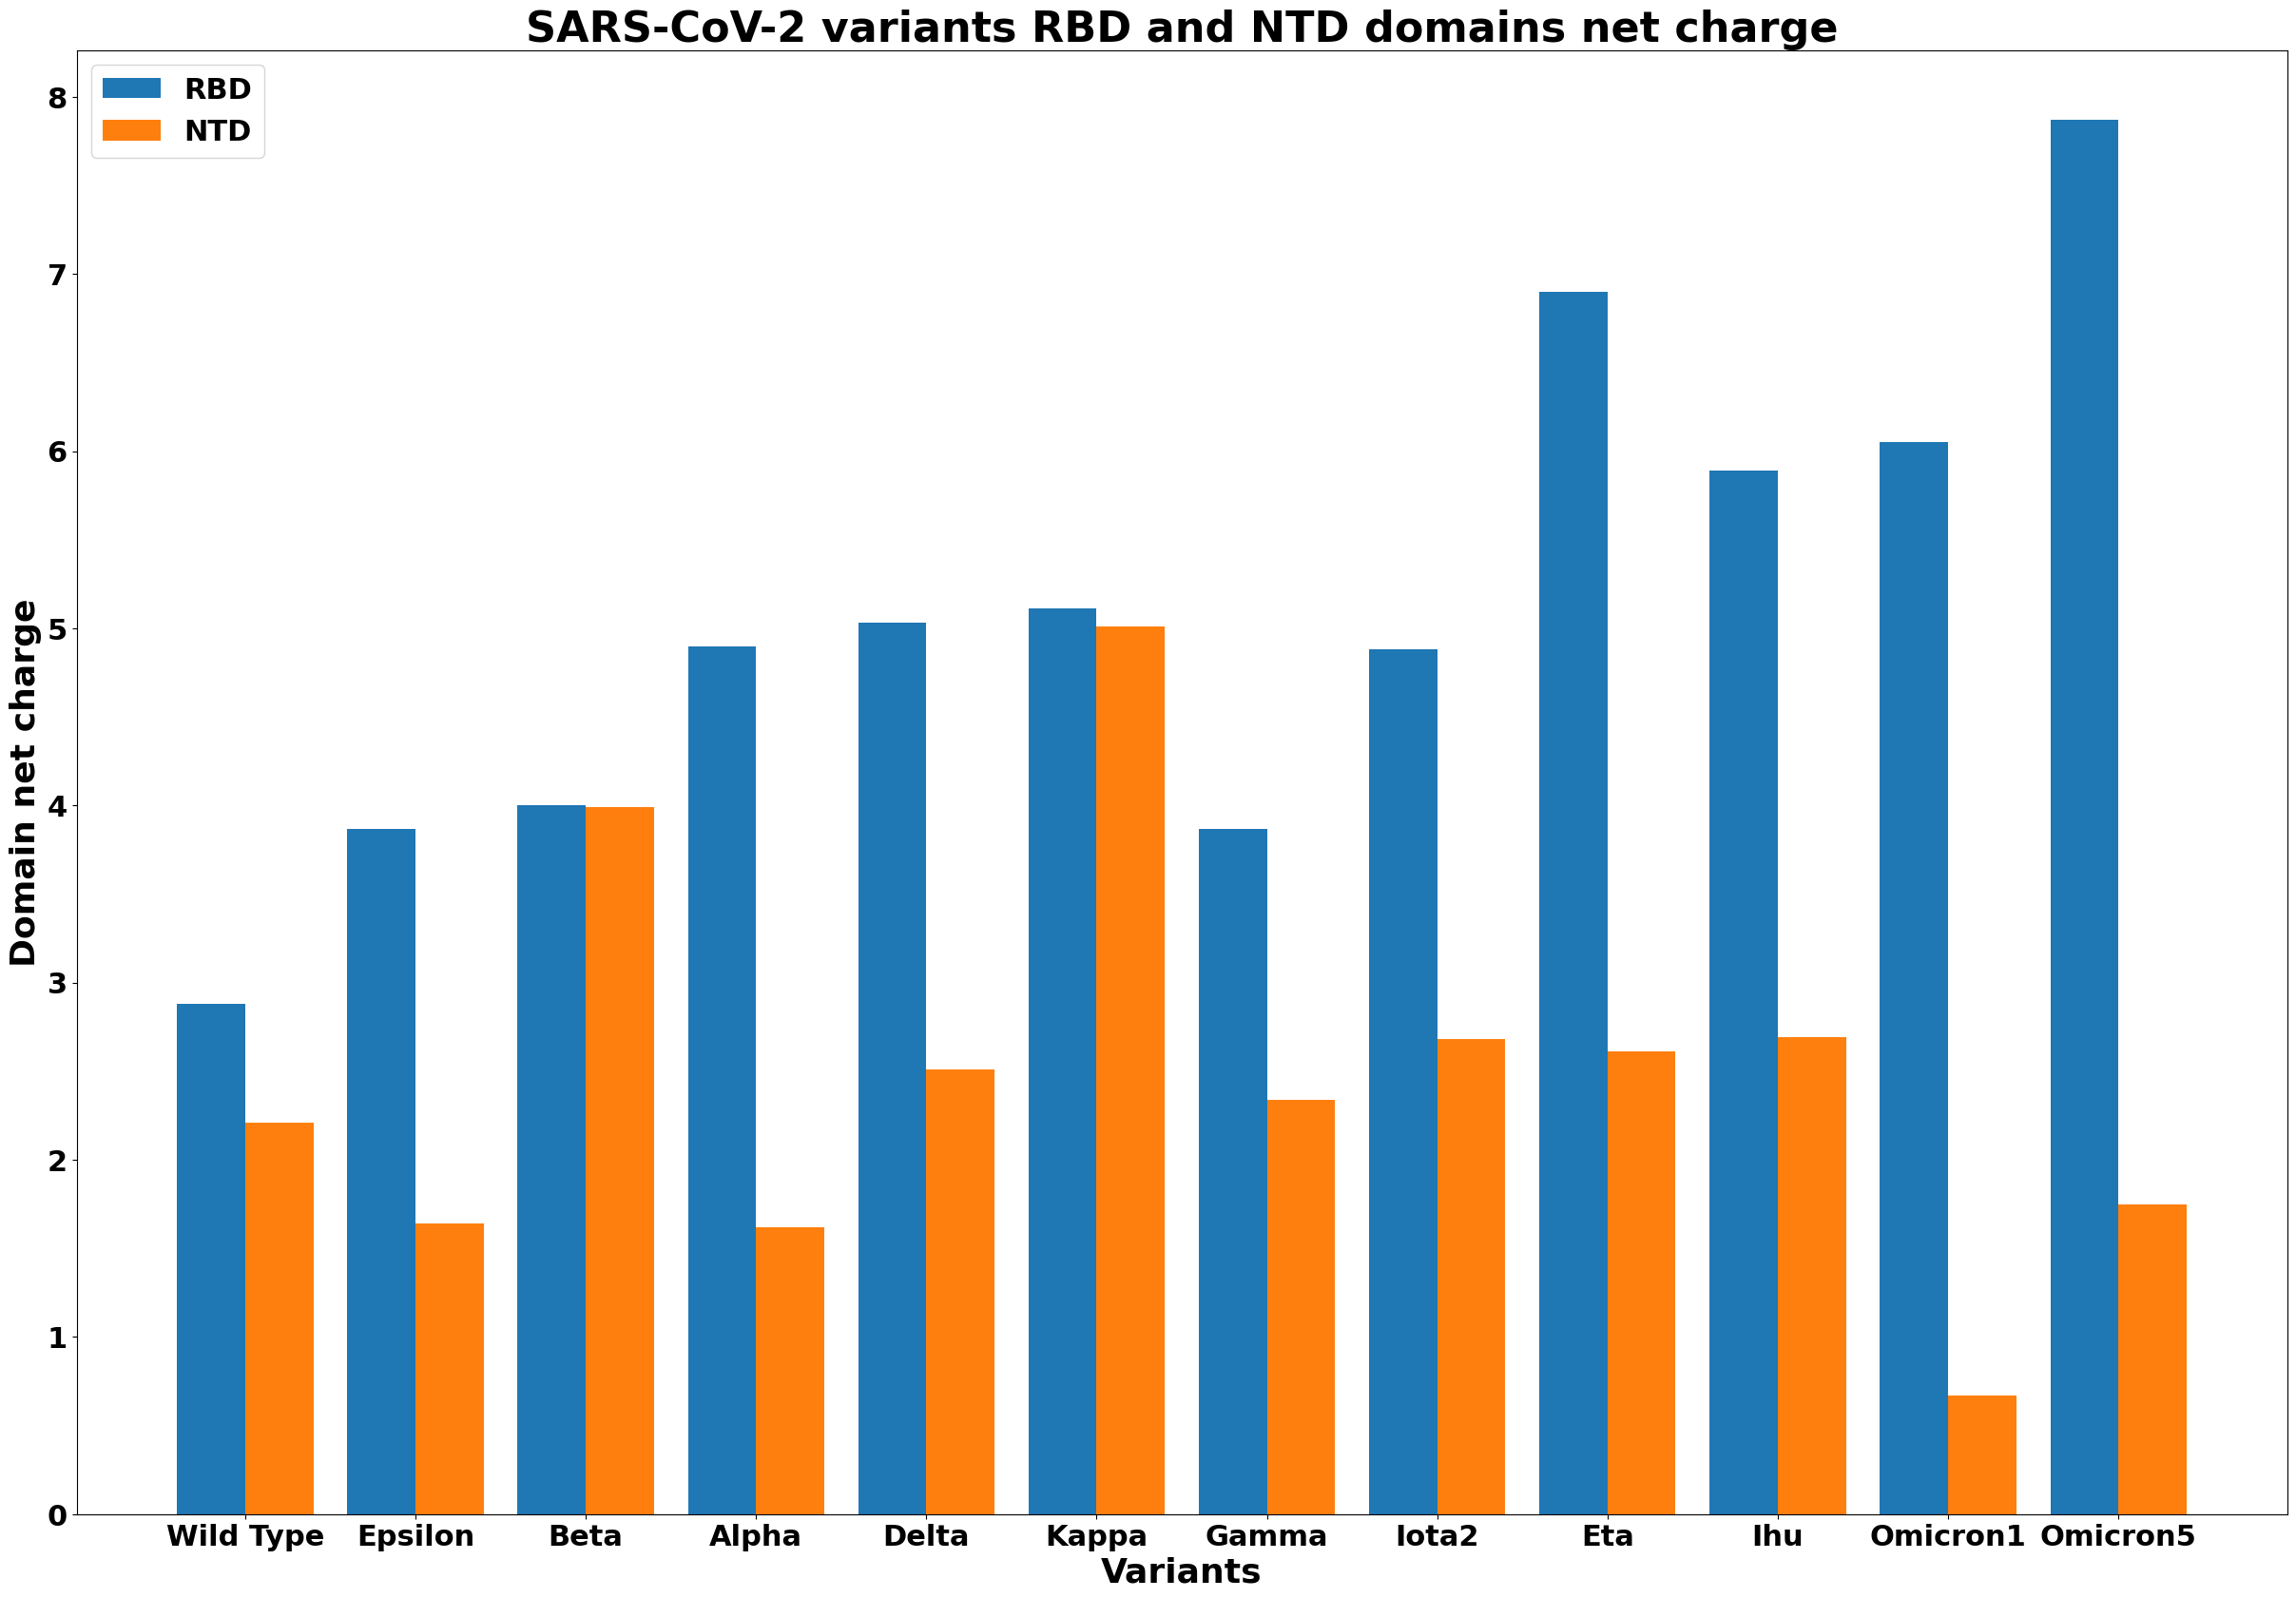

In [76]:
variants = list(ep_rbd.keys())
variants = [spikes[variant] for variant in variants]
n = len(variants)
r = np.arange(n)
width = 0.4
y_rbd = list(ep_rbd.values())
y_ntd = list(ep_ntd.values())
plt.figure(figsize = (30, 20))
plt.bar(r-width/2, y_rbd, width, label = "RBD")
plt.bar(r+width/2, y_ntd, width, label = "NTD")
plt.xlabel("Variants", size=26, weight = "bold")
plt.ylabel("Domain net charge", size=26, weight = "bold")
plt.title("SARS-CoV-2 variants RBD and NTD domains net charge", size=32, weight = "bold")
plt.xticks(r, variants, size=22, weight = "bold")
plt.yticks(size=22, weight = "bold")
plt.legend(loc="upper left", prop={'size': 22, "weight": "bold"})
plt.savefig("Fig9.png", dpi = 600)

In [ ]:
df.to_csv("Data/EP_domains.csv")